# Packages

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Data

## Import

In [2]:
results_paths_list=["~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200808.csv",
                    "~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200809.csv",
                    "~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py36-cuda90_20191013.csv",
                    "~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200807.csv"]

results_df=pd.DataFrame()
for path in results_paths_list:
# for path in [results_path_part1,results_path_part2,results_path_part3,results_path_part4]:
    results_df=pd.concat([results_df, pd.read_csv(path)])

# deduplicate indices (in all parts they start from 0)
results_df=results_df.reset_index(drop=True)
assert(len(results_df.index.value_counts().value_counts())==1)

results_df


,timestamp,algo,version,device,cpu_threads,nrows_train,ncols,total_items,num_iterations,learning_rate,wall_time_secs
0,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
1,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769
2,2020-08-08 20:47:17.764,lightgbm,3.0.0rc1,gpu,1,10000,100,1000000,1000,0.1,5.952390
3,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197
4,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
...,...,...,...,...,...,...,...,...,...,...,...
186752,2020-08-11 11:43:44.387,lightgbm,2.3.1,cpu,1,10000,10000,100000000,1000,0.1,1294.529301
186753,2020-08-11 11:43:51.608,lightgbm,2.3.1,cpu,1,100000,10,1000000,1000,0.1,6.932150
186754,2020-08-11 11:44:25.538,lightgbm,2.3.1,cpu,1,100000,100,10000000,1000,0.1,33.508180
186755,2020-08-11 11:51:04.853,lightgbm,2.3.1,cpu,1,100000,1000,100000000,1000,0.1,395.297421


## Clean up

In [3]:
# eliminate all lightgbm gpu data prior to 2020-08-10 16:00
# (no gpu was used then in case of lightgbm, but the problem 
# was later corrected and data imported from part2 
# is a correction for this problematic subset);
# note: keeping dates and times in ISO notation 
# allows for simple string comparisons
ok_datetimes_start = datetime.strptime("2020-08-10 16:00:00", "%Y-%m-%d %H:%M:%S")
results_df['is_datetime_ok'] = pd.to_datetime(results_df['timestamp']) > ok_datetimes_start

results_df['is_all_lgbm_gpu_data'] = results_df['algo'].isin(['lightgbm']) & results_df['device'].isin(['gpu'])

results_df['is_all_data_ok'] = ~results_df['is_all_lgbm_gpu_data'] | results_df['is_datetime_ok']
# results_df.loc[results_df['is_all_data_ok']==False, 'timestamp']
# results_df[150:]

results_df=results_df.loc[results_df['is_all_data_ok'], :].copy()
results_df

,timestamp,algo,version,device,cpu_threads,nrows_train,ncols,total_items,num_iterations,learning_rate,wall_time_secs,is_datetime_ok,is_all_lgbm_gpu_data,is_all_data_ok
1,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769,False,False,True
3,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197,False,False,True
5,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769,False,False,True
7,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197,False,False,True
9,2020-08-08 20:48:38.225,xgboost,1.2.0rc1,gpu,1,10000,1000,10000000,1000,0.1,12.667269,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186752,2020-08-11 11:43:44.387,lightgbm,2.3.1,cpu,1,10000,10000,100000000,1000,0.1,1294.529301,True,False,True
186753,2020-08-11 11:43:51.608,lightgbm,2.3.1,cpu,1,100000,10,1000000,1000,0.1,6.932150,True,False,True
186754,2020-08-11 11:44:25.538,lightgbm,2.3.1,cpu,1,100000,100,10000000,1000,0.1,33.508180,True,False,True
186755,2020-08-11 11:51:04.853,lightgbm,2.3.1,cpu,1,100000,1000,100000000,1000,0.1,395.297421,True,False,True


# Features

In [4]:
# insert the data_shape feature (as total_items masks 
# different impact of width and height on performance)
results_df['data_shape']=results_df['nrows_train'].astype(str) + '_x_' + results_df['ncols'].astype(str)
results_df['data_shape'].value_counts()


10000_x_10       18875
10000_x_100      18706
10000_x_1000     18539
10000_x_10000    18375
100000_x_10      18216
100000_x_100     18057
100000_x_1000    17898
1000000_x_10     17739
1000000_x_100    17580
10000000_x_10    17426
Name: data_shape, dtype: int64

In [5]:
# insert the algo_version feature (for measuring
# the differences in implementation efficiency 
# for various versions/builds of the same algo)
results_df['algo_ver']=results_df['algo'].astype(str) + ' ' + \
                                results_df['version'].astype(str)
results_df['algo_ver'].value_counts()


lightgbm 2.2.3       68271
lightgbm 2.3.1       52374
lightgbm 3.0.0rc1    32858
xgboost 1.2.0rc1     27908
Name: algo_ver, dtype: int64

In [6]:
# insert the algo_device_ver feature (for measuring
# the differences in implementation efficiency;
# note that for brevity on plots we take only major.minor version parts
results_df['algo_ver_device']=results_df['algo'].astype(str) + ' ' + \
                              results_df['version'].astype(str).str[:3]+ ' (' + \
                              results_df['device'].str.upper() + ')'
results_df['algo_ver_device'].value_counts()


lightgbm 2.2 (CPU)    55350
lightgbm 2.3 (CPU)    42078
lightgbm 3.0 (CPU)    22562
xgboost 1.2 (CPU)     22562
lightgbm 2.2 (GPU)    12921
lightgbm 3.0 (GPU)    10296
lightgbm 2.3 (GPU)    10296
xgboost 1.2 (GPU)      5346
Name: algo_ver_device, dtype: int64

In [7]:
# insert the algo_ver_device_cores feature (for measuring
# the differences in implementation efficiency 
# for various algos separately in each device 
# and measuring the impact on performance
# of the number of CPU cores)
results_df['algo_ver_device_cores']=results_df['algo'].astype(str) + ' ' + \
                                results_df['version'].astype(str).str[:3]+ ' (' + \
                                results_df['device'].str.upper() + ' ' + \
                                results_df['cpu_threads'].astype(str) + 'c)'
results_df['algo_ver_device_cores'].value_counts()


lightgbm 2.2 (GPU 1c)     12921
lightgbm 2.2 (CPU 1c)     12270
lightgbm 2.2 (CPU 4c)     11670
lightgbm 2.2 (CPU 8c)     11070
lightgbm 2.2 (CPU 16c)    10470
lightgbm 2.3 (GPU 1c)     10296
lightgbm 3.0 (GPU 1c)     10296
lightgbm 2.2 (CPU 32c)     9870
lightgbm 2.3 (CPU 1c)      8698
lightgbm 2.3 (CPU 4c)      8050
lightgbm 2.3 (CPU 8c)      7450
lightgbm 2.3 (CPU 16c)     6850
lightgbm 2.3 (CPU 32c)     6250
xgboost 1.2 (GPU 1c)       5346
xgboost 1.2 (CPU 4c)       5176
lightgbm 3.0 (CPU 4c)      5176
lightgbm 2.3 (CPU 64c)     4780
lightgbm 3.0 (CPU 8c)      4740
xgboost 1.2 (CPU 8c)       4740
lightgbm 3.0 (CPU 16c)     4425
xgboost 1.2 (CPU 16c)      4425
lightgbm 3.0 (CPU 32c)     3940
xgboost 1.2 (CPU 32c)      3940
lightgbm 3.0 (CPU 64c)     3540
xgboost 1.2 (CPU 64c)      3540
xgboost 1.2 (CPU 1c)        741
lightgbm 3.0 (CPU 1c)       741
Name: algo_ver_device_cores, dtype: int64

# Analysis

## Plots

In [8]:
# do not plot measurements for 64-cores as outliers
outliers_threads_num=64
query='cpu_threads != "%s"' % (outliers_threads_num)        

plotted_results_df = results_df.query(query)
plotted_results_df['cpu_threads'].value_counts()


1     61309
4     30072
8     28000
16    26170
32    24000
Name: cpu_threads, dtype: int64

In [9]:
sorted(plotted_results_df.columns)

['algo',
 'algo_ver',
 'algo_ver_device',
 'algo_ver_device_cores',
 'cpu_threads',
 'data_shape',
 'device',
 'is_all_data_ok',
 'is_all_lgbm_gpu_data',
 'is_datetime_ok',
 'learning_rate',
 'ncols',
 'nrows_train',
 'num_iterations',
 'timestamp',
 'total_items',
 'version',
 'wall_time_secs']

['algo_ver_device_cores', 'algo_ver_device', 'algo_ver', 'algo', 'version', 'device']
1.343 1247.255


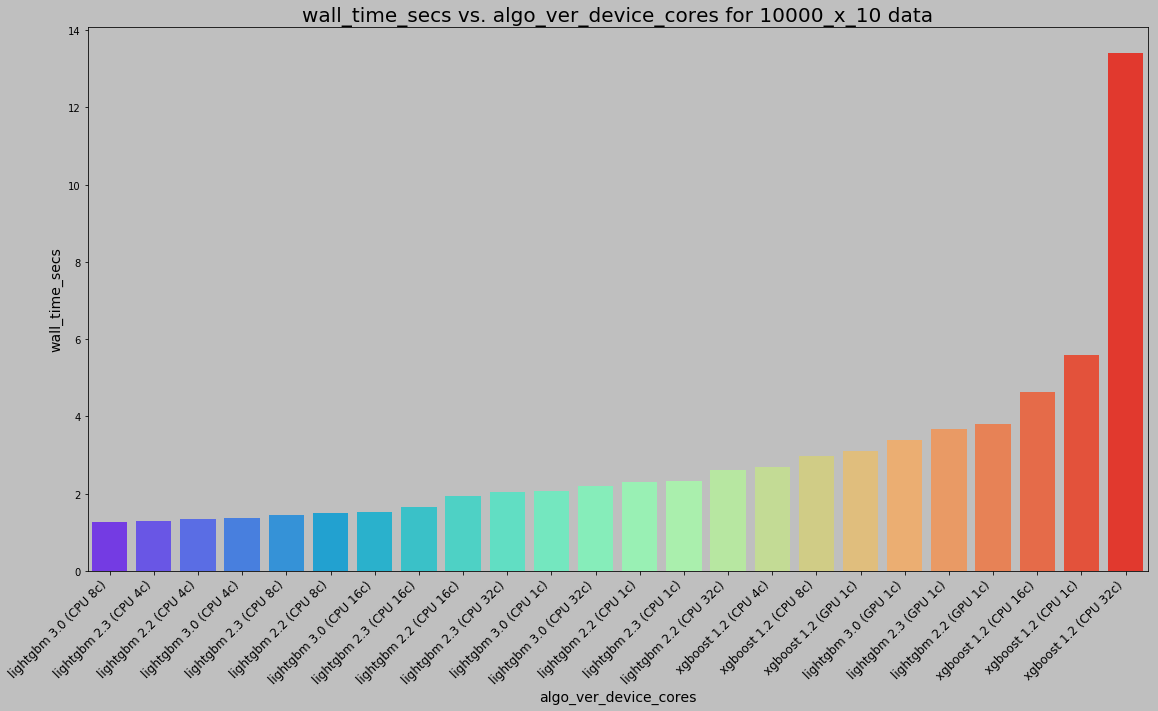

data_shape == "10000_x_10" :
                       wall_time_secs
algo_ver_device_cores                
lightgbm 3.0 (CPU 8c)            1.26
lightgbm 2.3 (CPU 4c)            1.30
lightgbm 2.2 (CPU 4c)            1.34
lightgbm 3.0 (CPU 4c)            1.37
lightgbm 2.3 (CPU 8c)            1.45
lightgbm 2.2 (CPU 8c)            1.49
lightgbm 3.0 (CPU 16c)           1.51
lightgbm 2.3 (CPU 16c)           1.64
lightgbm 2.2 (CPU 16c)           1.94
lightgbm 2.3 (CPU 32c)           2.05
lightgbm 3.0 (CPU 1c)            2.06
lightgbm 3.0 (CPU 32c)           2.20
lightgbm 2.2 (CPU 1c)            2.31
lightgbm 2.3 (CPU 1c)            2.31
lightgbm 2.2 (CPU 32c)           2.61
xgboost 1.2 (CPU 4c)             2.69
xgboost 1.2 (CPU 8c)             2.97
xgboost 1.2 (GPU 1c)             3.11
lightgbm 3.0 (GPU 1c)            3.40
lightgbm 2.3 (GPU 1c)            3.68
lightgbm 2.2 (GPU 1c)            3.79
xgboost 1.2 (CPU 16c)            4.63
xgboost 1.2 (CPU 1c)             5.60
xgboost 1.2 (CPU 32c)

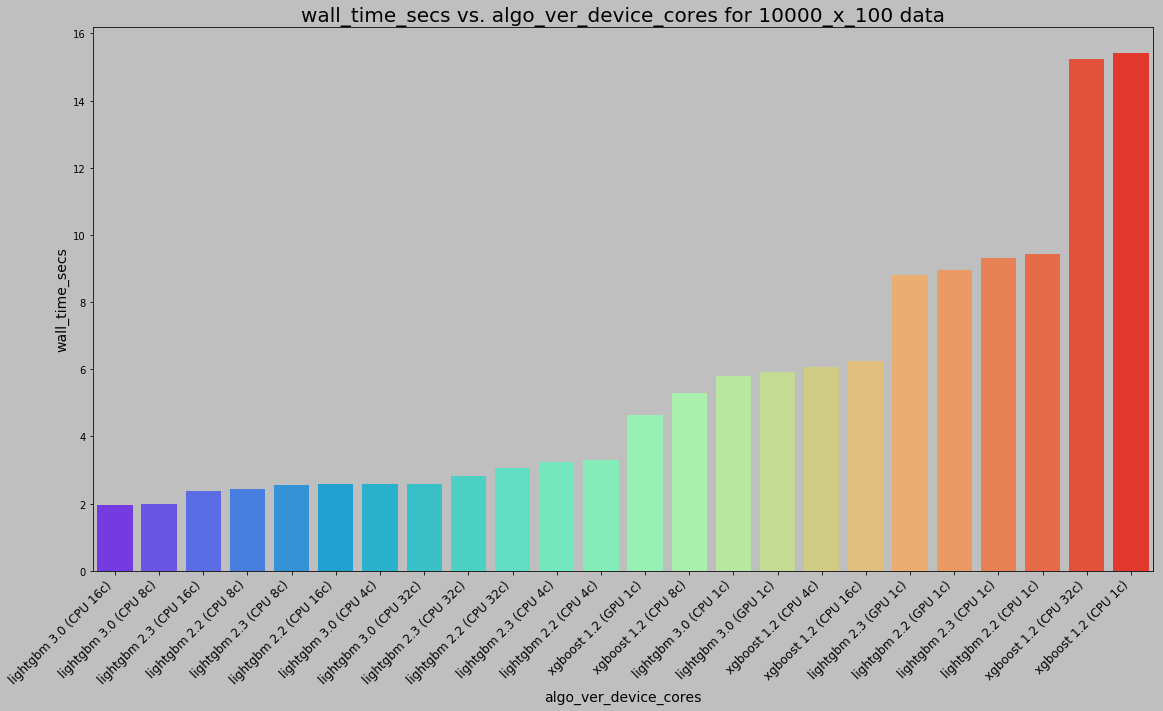

data_shape == "10000_x_100" :
                       wall_time_secs
algo_ver_device_cores                
lightgbm 3.0 (CPU 16c)           1.95
lightgbm 3.0 (CPU 8c)            1.99
lightgbm 2.3 (CPU 16c)           2.37
lightgbm 2.2 (CPU 8c)            2.43
lightgbm 2.3 (CPU 8c)            2.55
lightgbm 2.2 (CPU 16c)           2.58
lightgbm 3.0 (CPU 4c)            2.58
lightgbm 3.0 (CPU 32c)           2.59
lightgbm 2.3 (CPU 32c)           2.81
lightgbm 2.2 (CPU 32c)           3.05
lightgbm 2.3 (CPU 4c)            3.24
lightgbm 2.2 (CPU 4c)            3.30
xgboost 1.2 (GPU 1c)             4.63
xgboost 1.2 (CPU 8c)             5.30
lightgbm 3.0 (CPU 1c)            5.79
lightgbm 3.0 (GPU 1c)            5.93
xgboost 1.2 (CPU 4c)             6.08
xgboost 1.2 (CPU 16c)            6.23
lightgbm 2.3 (GPU 1c)            8.82
lightgbm 2.2 (GPU 1c)            8.96
lightgbm 2.3 (CPU 1c)            9.31
lightgbm 2.2 (CPU 1c)            9.44
xgboost 1.2 (CPU 32c)           15.23
xgboost 1.2 (CPU 1c)

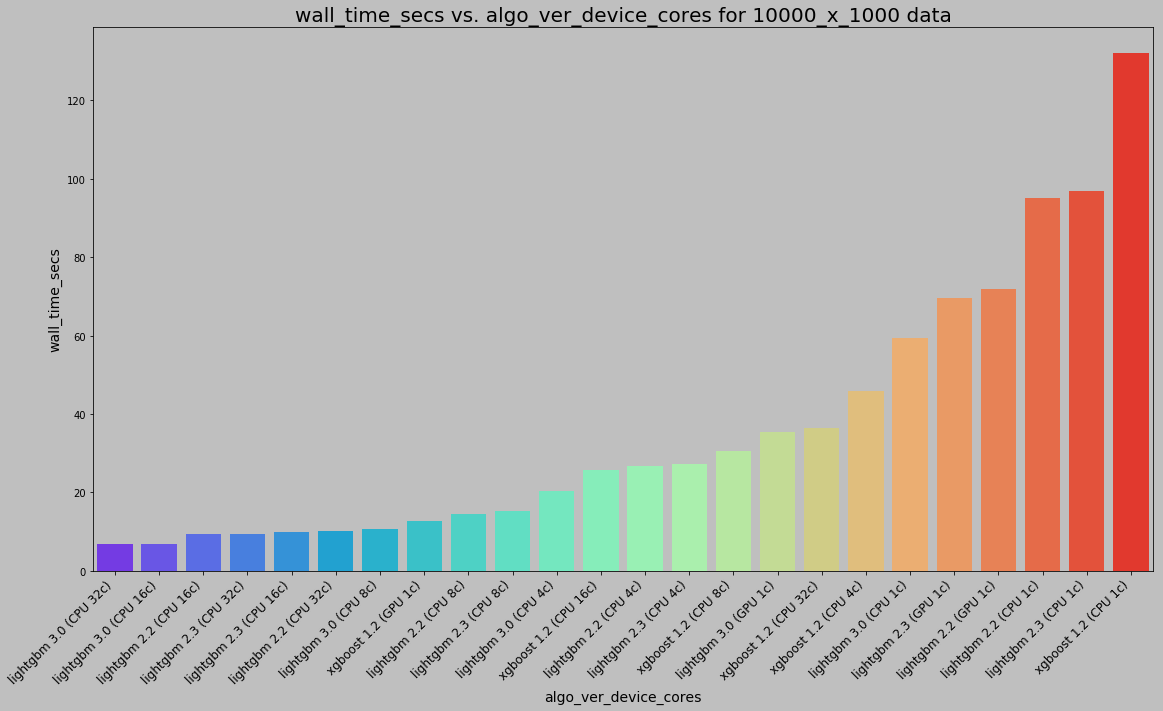

data_shape == "10000_x_1000" :
                       wall_time_secs
algo_ver_device_cores                
lightgbm 3.0 (CPU 32c)           6.75
lightgbm 3.0 (CPU 16c)           6.89
lightgbm 2.2 (CPU 16c)           9.42
lightgbm 2.3 (CPU 32c)           9.49
lightgbm 2.3 (CPU 16c)           9.79
lightgbm 2.2 (CPU 32c)          10.16
lightgbm 3.0 (CPU 8c)           10.59
xgboost 1.2 (GPU 1c)            12.69
lightgbm 2.2 (CPU 8c)           14.60
lightgbm 2.3 (CPU 8c)           15.14
lightgbm 3.0 (CPU 4c)           20.37
xgboost 1.2 (CPU 16c)           25.63
lightgbm 2.2 (CPU 4c)           26.61
lightgbm 2.3 (CPU 4c)           27.17
xgboost 1.2 (CPU 8c)            30.61
lightgbm 3.0 (GPU 1c)           35.39
xgboost 1.2 (CPU 32c)           36.44
xgboost 1.2 (CPU 4c)            45.79
lightgbm 3.0 (CPU 1c)           59.48
lightgbm 2.3 (GPU 1c)           69.52
lightgbm 2.2 (GPU 1c)           71.75
lightgbm 2.2 (CPU 1c)           95.02
lightgbm 2.3 (CPU 1c)           96.97
xgboost 1.2 (CPU 1c

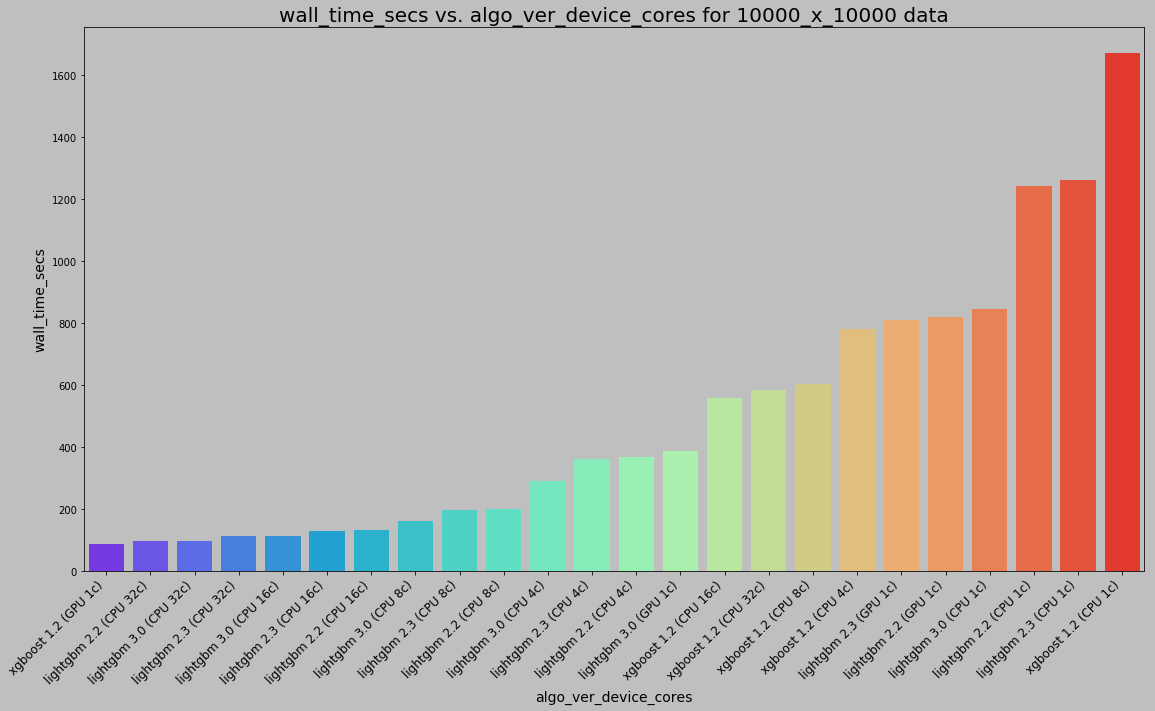

data_shape == "10000_x_10000" :
                       wall_time_secs
algo_ver_device_cores                
xgboost 1.2 (GPU 1c)            84.98
lightgbm 2.2 (CPU 32c)          96.29
lightgbm 3.0 (CPU 32c)          97.42
lightgbm 2.3 (CPU 32c)         111.77
lightgbm 3.0 (CPU 16c)         113.16
lightgbm 2.3 (CPU 16c)         129.14
lightgbm 2.2 (CPU 16c)         130.23
lightgbm 3.0 (CPU 8c)          160.83
lightgbm 2.3 (CPU 8c)          195.30
lightgbm 2.2 (CPU 8c)          200.67
lightgbm 3.0 (CPU 4c)          289.49
lightgbm 2.3 (CPU 4c)          362.18
lightgbm 2.2 (CPU 4c)          366.24
lightgbm 3.0 (GPU 1c)          385.35
xgboost 1.2 (CPU 16c)          558.40
xgboost 1.2 (CPU 32c)          582.32
xgboost 1.2 (CPU 8c)           604.22
xgboost 1.2 (CPU 4c)           779.05
lightgbm 2.3 (GPU 1c)          807.78
lightgbm 2.2 (GPU 1c)          817.52
lightgbm 3.0 (CPU 1c)          845.97
lightgbm 2.2 (CPU 1c)         1242.98
lightgbm 2.3 (CPU 1c)         1261.61
xgboost 1.2 (CPU 1

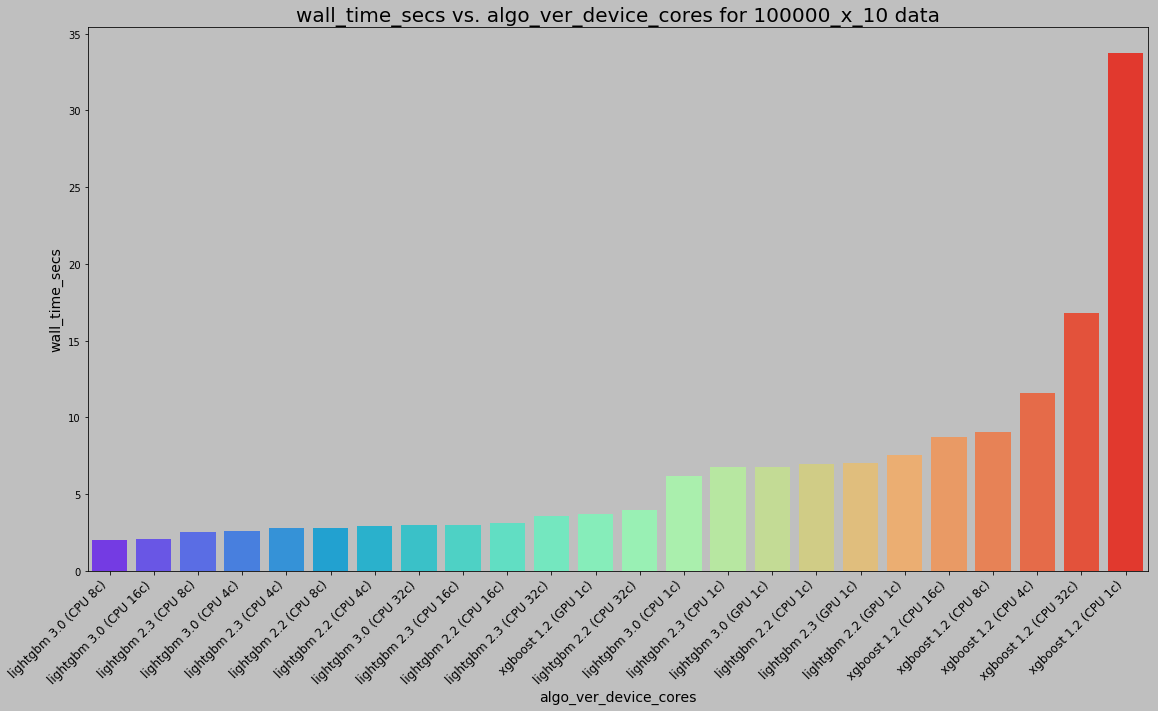

data_shape == "100000_x_10" :
                       wall_time_secs
algo_ver_device_cores                
lightgbm 3.0 (CPU 8c)            1.99
lightgbm 3.0 (CPU 16c)           2.10
lightgbm 2.3 (CPU 8c)            2.55
lightgbm 3.0 (CPU 4c)            2.62
lightgbm 2.3 (CPU 4c)            2.78
lightgbm 2.2 (CPU 8c)            2.79
lightgbm 2.2 (CPU 4c)            2.89
lightgbm 3.0 (CPU 32c)           2.96
lightgbm 2.3 (CPU 16c)           2.98
lightgbm 2.2 (CPU 16c)           3.13
lightgbm 2.3 (CPU 32c)           3.60
xgboost 1.2 (GPU 1c)             3.70
lightgbm 2.2 (CPU 32c)           3.98
lightgbm 3.0 (CPU 1c)            6.17
lightgbm 2.3 (CPU 1c)            6.75
lightgbm 3.0 (GPU 1c)            6.75
lightgbm 2.2 (CPU 1c)            6.98
lightgbm 2.3 (GPU 1c)            7.01
lightgbm 2.2 (GPU 1c)            7.55
xgboost 1.2 (CPU 16c)            8.75
xgboost 1.2 (CPU 8c)             9.03
xgboost 1.2 (CPU 4c)            11.57
xgboost 1.2 (CPU 32c)           16.79
xgboost 1.2 (CPU 1c)

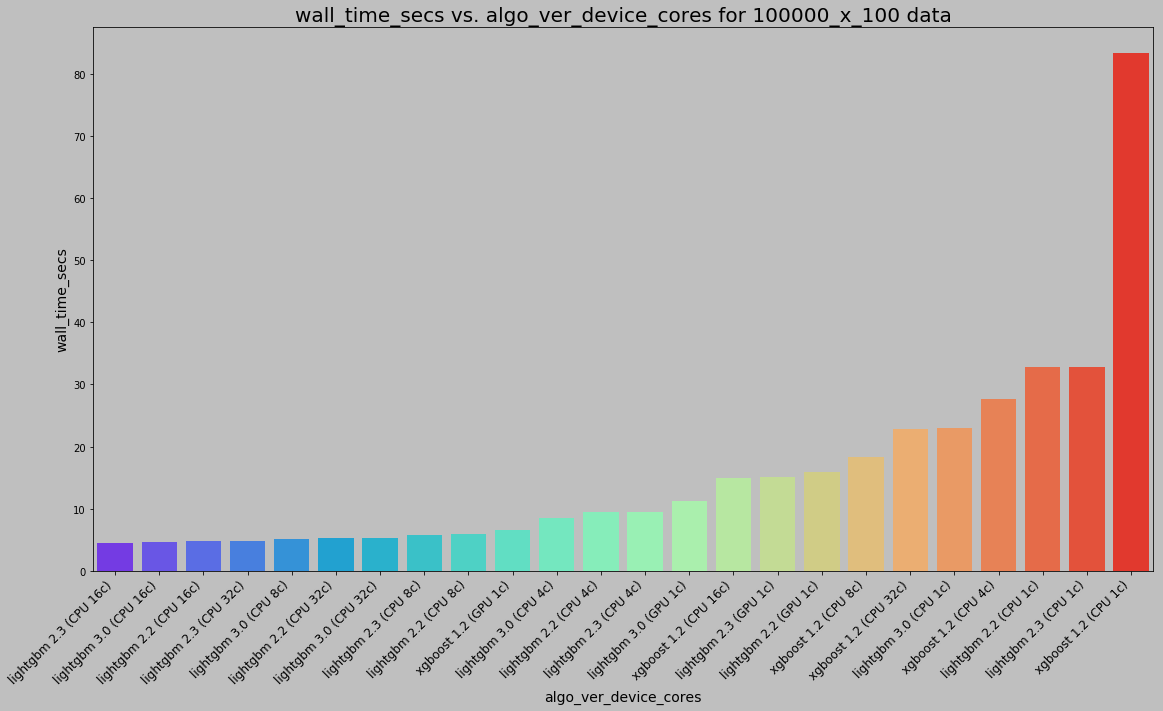

data_shape == "100000_x_100" :
                       wall_time_secs
algo_ver_device_cores                
lightgbm 2.3 (CPU 16c)           4.54
lightgbm 3.0 (CPU 16c)           4.68
lightgbm 2.2 (CPU 16c)           4.80
lightgbm 2.3 (CPU 32c)           4.84
lightgbm 3.0 (CPU 8c)            5.12
lightgbm 2.2 (CPU 32c)           5.30
lightgbm 3.0 (CPU 32c)           5.31
lightgbm 2.3 (CPU 8c)            5.82
lightgbm 2.2 (CPU 8c)            5.94
xgboost 1.2 (GPU 1c)             6.65
lightgbm 3.0 (CPU 4c)            8.46
lightgbm 2.2 (CPU 4c)            9.50
lightgbm 2.3 (CPU 4c)            9.54
lightgbm 3.0 (GPU 1c)           11.31
xgboost 1.2 (CPU 16c)           15.01
lightgbm 2.3 (GPU 1c)           15.06
lightgbm 2.2 (GPU 1c)           15.85
xgboost 1.2 (CPU 8c)            18.29
xgboost 1.2 (CPU 32c)           22.75
lightgbm 3.0 (CPU 1c)           22.91
xgboost 1.2 (CPU 4c)            27.60
lightgbm 2.2 (CPU 1c)           32.76
lightgbm 2.3 (CPU 1c)           32.83
xgboost 1.2 (CPU 1c

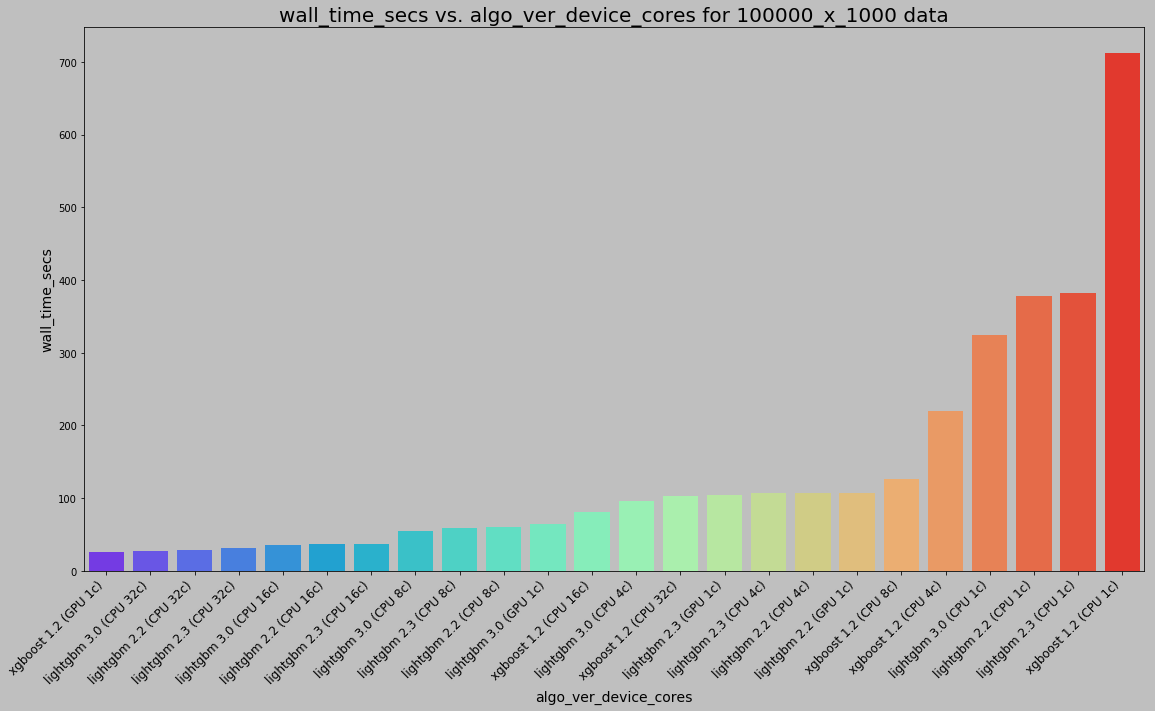

data_shape == "100000_x_1000" :
                       wall_time_secs
algo_ver_device_cores                
xgboost 1.2 (GPU 1c)            25.61
lightgbm 3.0 (CPU 32c)          27.35
lightgbm 2.2 (CPU 32c)          28.33
lightgbm 2.3 (CPU 32c)          31.28
lightgbm 3.0 (CPU 16c)          34.84
lightgbm 2.2 (CPU 16c)          37.05
lightgbm 2.3 (CPU 16c)          37.27
lightgbm 3.0 (CPU 8c)           54.63
lightgbm 2.3 (CPU 8c)           58.35
lightgbm 2.2 (CPU 8c)           60.49
lightgbm 3.0 (GPU 1c)           64.18
xgboost 1.2 (CPU 16c)           80.39
lightgbm 3.0 (CPU 4c)           95.92
xgboost 1.2 (CPU 32c)          102.34
lightgbm 2.3 (GPU 1c)          104.67
lightgbm 2.3 (CPU 4c)          106.35
lightgbm 2.2 (CPU 4c)          107.18
lightgbm 2.2 (GPU 1c)          107.68
xgboost 1.2 (CPU 8c)           126.65
xgboost 1.2 (CPU 4c)           220.32
lightgbm 3.0 (CPU 1c)          323.64
lightgbm 2.2 (CPU 1c)          378.44
lightgbm 2.3 (CPU 1c)          381.72
xgboost 1.2 (CPU 1

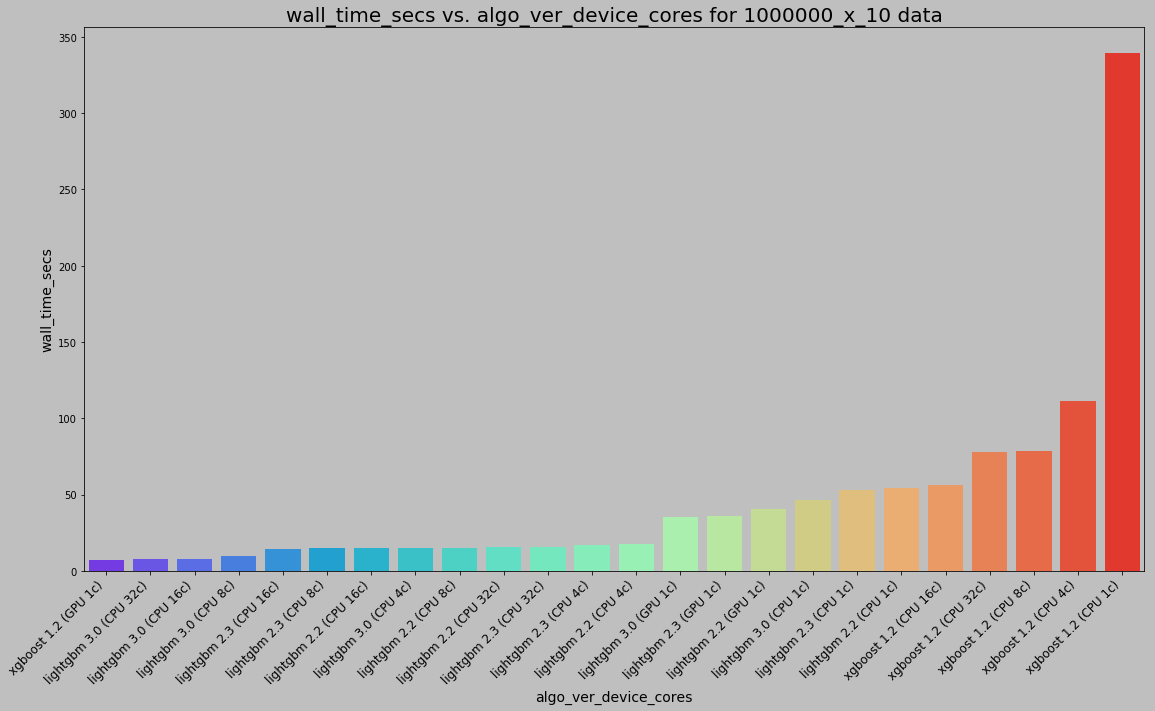

data_shape == "1000000_x_10" :
                       wall_time_secs
algo_ver_device_cores                
xgboost 1.2 (GPU 1c)             6.98
lightgbm 3.0 (CPU 32c)           7.43
lightgbm 3.0 (CPU 16c)           7.43
lightgbm 3.0 (CPU 8c)            9.71
lightgbm 2.3 (CPU 16c)          14.26
lightgbm 2.3 (CPU 8c)           14.78
lightgbm 2.2 (CPU 16c)          14.96
lightgbm 3.0 (CPU 4c)           15.02
lightgbm 2.2 (CPU 8c)           15.28
lightgbm 2.2 (CPU 32c)          15.44
lightgbm 2.3 (CPU 32c)          15.94
lightgbm 2.3 (CPU 4c)           16.99
lightgbm 2.2 (CPU 4c)           17.63
lightgbm 3.0 (GPU 1c)           35.29
lightgbm 2.3 (GPU 1c)           36.12
lightgbm 2.2 (GPU 1c)           40.54
lightgbm 3.0 (CPU 1c)           46.65
lightgbm 2.3 (CPU 1c)           52.64
lightgbm 2.2 (CPU 1c)           54.50
xgboost 1.2 (CPU 16c)           56.31
xgboost 1.2 (CPU 32c)           78.05
xgboost 1.2 (CPU 8c)            78.75
xgboost 1.2 (CPU 4c)           110.96
xgboost 1.2 (CPU 1c

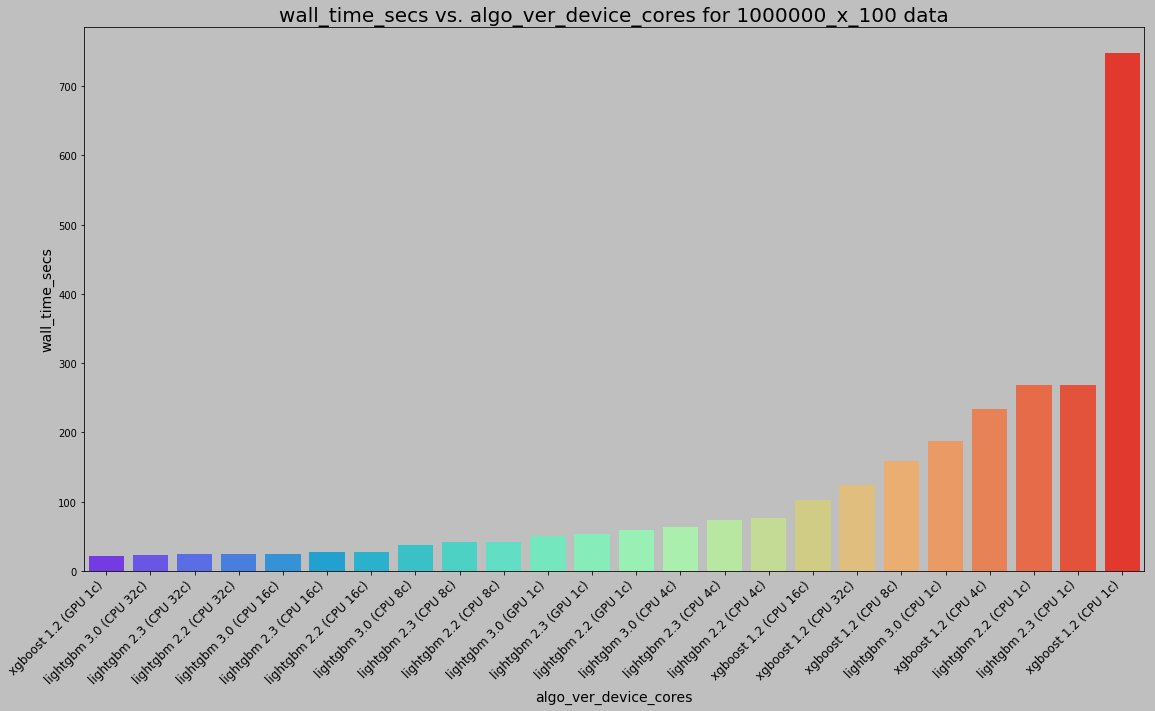

data_shape == "1000000_x_100" :
                       wall_time_secs
algo_ver_device_cores                
xgboost 1.2 (GPU 1c)            21.10
lightgbm 3.0 (CPU 32c)          22.51
lightgbm 2.3 (CPU 32c)          24.01
lightgbm 2.2 (CPU 32c)          24.39
lightgbm 3.0 (CPU 16c)          24.91
lightgbm 2.3 (CPU 16c)          26.72
lightgbm 2.2 (CPU 16c)          26.98
lightgbm 3.0 (CPU 8c)           37.81
lightgbm 2.3 (CPU 8c)           41.34
lightgbm 2.2 (CPU 8c)           41.95
lightgbm 3.0 (GPU 1c)           49.61
lightgbm 2.3 (GPU 1c)           53.89
lightgbm 2.2 (GPU 1c)           59.49
lightgbm 3.0 (CPU 4c)           63.49
lightgbm 2.3 (CPU 4c)           73.42
lightgbm 2.2 (CPU 4c)           76.67
xgboost 1.2 (CPU 16c)          101.99
xgboost 1.2 (CPU 32c)          123.94
xgboost 1.2 (CPU 8c)           158.55
lightgbm 3.0 (CPU 1c)          187.31
xgboost 1.2 (CPU 4c)           234.29
lightgbm 2.2 (CPU 1c)          268.06
lightgbm 2.3 (CPU 1c)          268.70
xgboost 1.2 (CPU 1

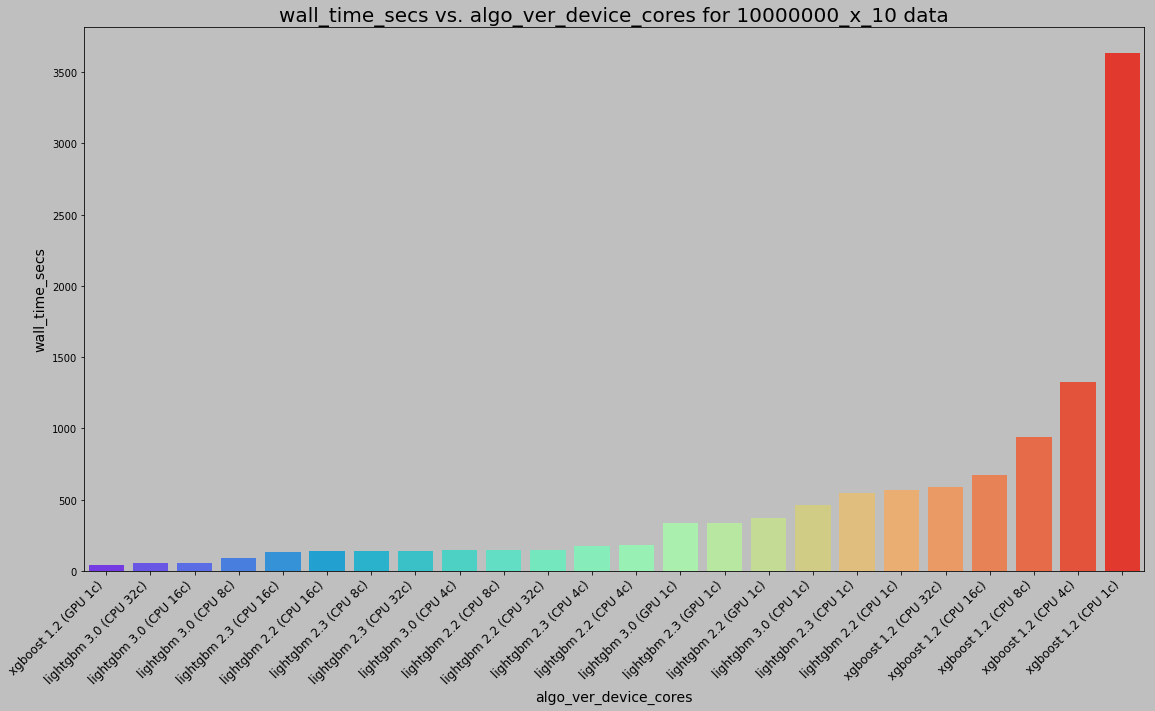

data_shape == "10000000_x_10" :
                       wall_time_secs
algo_ver_device_cores                
xgboost 1.2 (GPU 1c)            39.44
lightgbm 3.0 (CPU 32c)          58.18
lightgbm 3.0 (CPU 16c)          58.36
lightgbm 3.0 (CPU 8c)           89.00
lightgbm 2.3 (CPU 16c)         134.68
lightgbm 2.2 (CPU 16c)         138.14
lightgbm 2.3 (CPU 8c)          142.25
lightgbm 2.3 (CPU 32c)         142.26
lightgbm 3.0 (CPU 4c)          145.42
lightgbm 2.2 (CPU 8c)          148.95
lightgbm 2.2 (CPU 32c)         148.95
lightgbm 2.3 (CPU 4c)          173.00
lightgbm 2.2 (CPU 4c)          179.41
lightgbm 3.0 (GPU 1c)          336.75
lightgbm 2.3 (GPU 1c)          338.62
lightgbm 2.2 (GPU 1c)          372.33
lightgbm 3.0 (CPU 1c)          458.82
lightgbm 2.3 (CPU 1c)          547.18
lightgbm 2.2 (CPU 1c)          563.95
xgboost 1.2 (CPU 32c)          590.41
xgboost 1.2 (CPU 16c)          671.20
xgboost 1.2 (CPU 8c)           939.05
xgboost 1.2 (CPU 4c)          1325.92
xgboost 1.2 (CPU 1

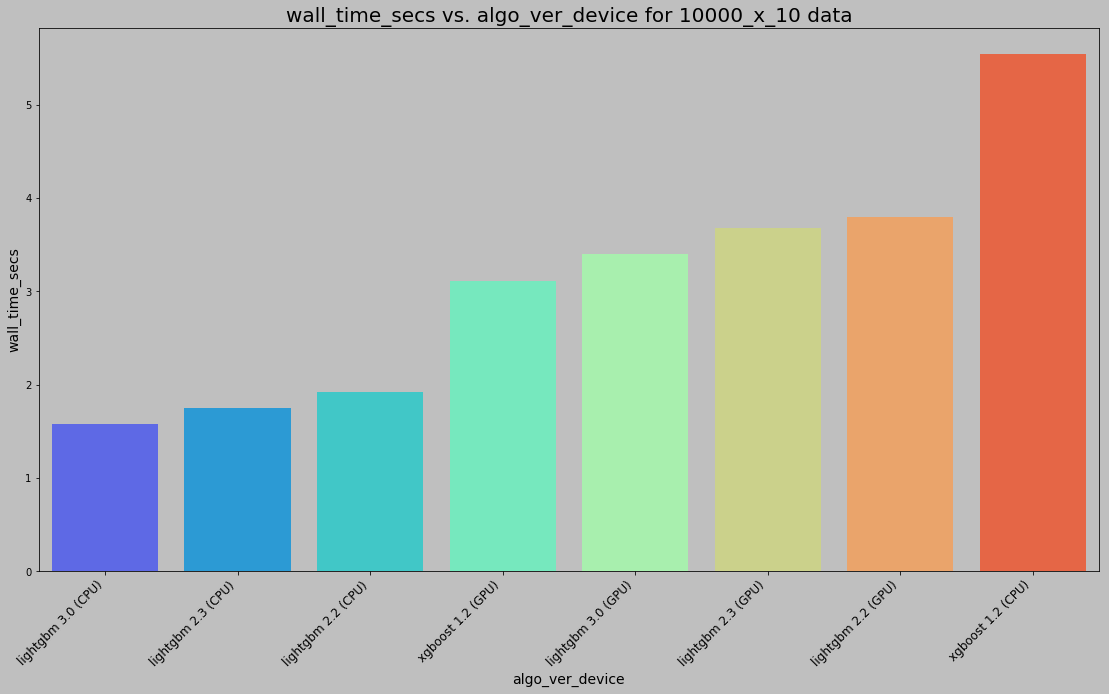

data_shape == "10000_x_10" :
                   wall_time_secs
algo_ver_device                  
lightgbm 3.0 (CPU)           1.58
lightgbm 2.3 (CPU)           1.75
lightgbm 2.2 (CPU)           1.93
xgboost 1.2 (GPU)            3.11
lightgbm 3.0 (GPU)           3.40
lightgbm 2.3 (GPU)           3.68
lightgbm 2.2 (GPU)           3.79
xgboost 1.2 (CPU)            5.55





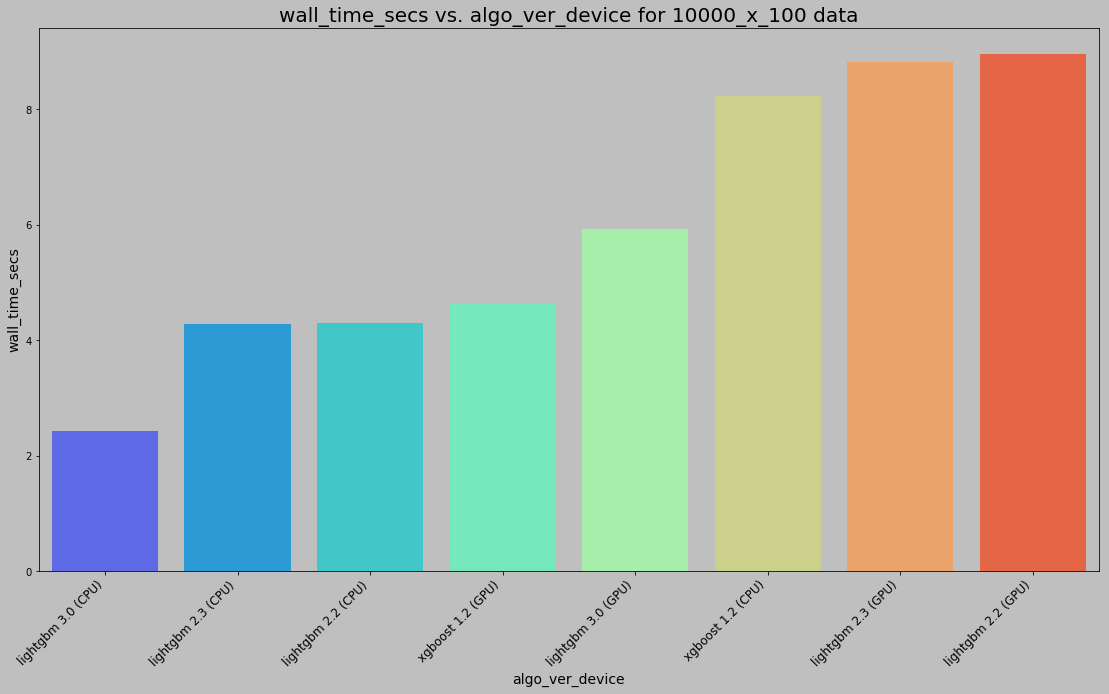

data_shape == "10000_x_100" :
                   wall_time_secs
algo_ver_device                  
lightgbm 3.0 (CPU)           2.43
lightgbm 2.3 (CPU)           4.29
lightgbm 2.2 (CPU)           4.30
xgboost 1.2 (GPU)            4.63
lightgbm 3.0 (GPU)           5.93
xgboost 1.2 (CPU)            8.23
lightgbm 2.3 (GPU)           8.82
lightgbm 2.2 (GPU)           8.96





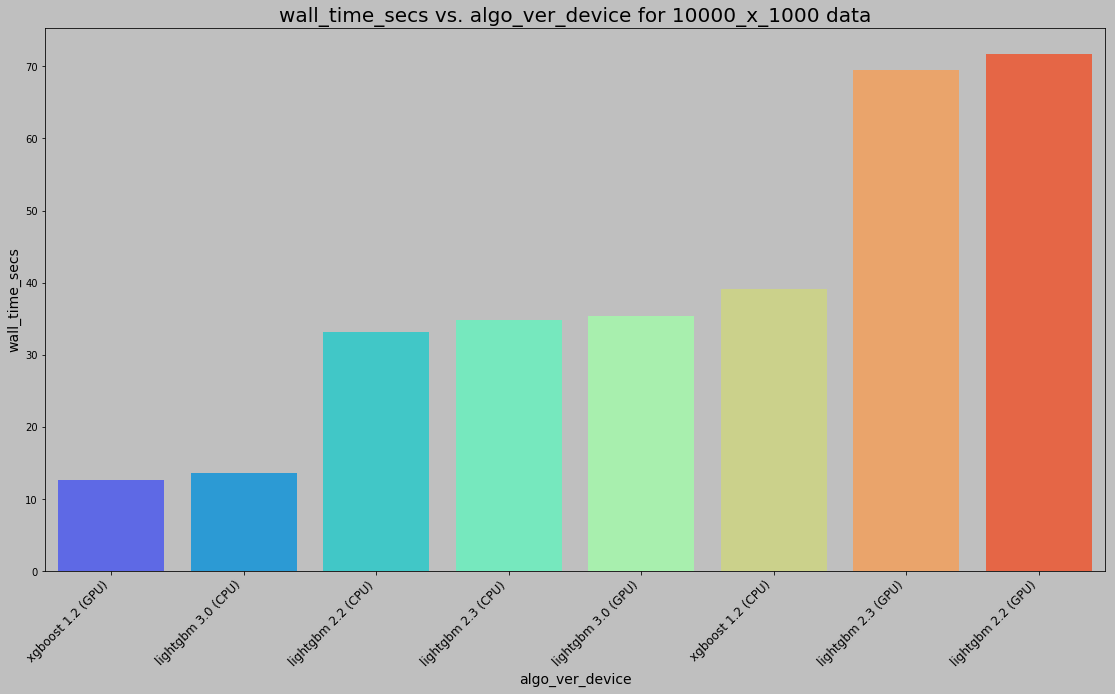

data_shape == "10000_x_1000" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)           12.69
lightgbm 3.0 (CPU)          13.68
lightgbm 2.2 (CPU)          33.16
lightgbm 2.3 (CPU)          34.88
lightgbm 3.0 (GPU)          35.39
xgboost 1.2 (CPU)           39.12
lightgbm 2.3 (GPU)          69.52
lightgbm 2.2 (GPU)          71.75





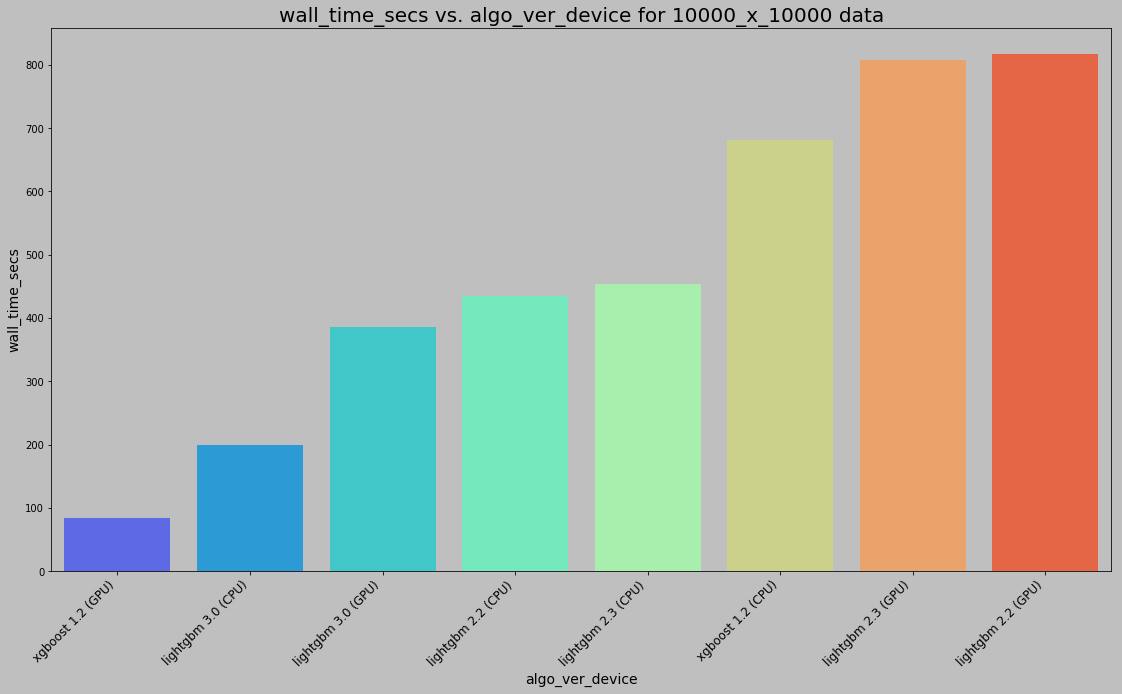

data_shape == "10000_x_10000" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)           84.98
lightgbm 3.0 (CPU)         199.87
lightgbm 3.0 (GPU)         385.35
lightgbm 2.2 (CPU)         434.48
lightgbm 2.3 (CPU)         453.38
xgboost 1.2 (CPU)          680.56
lightgbm 2.3 (GPU)         807.78
lightgbm 2.2 (GPU)         817.52





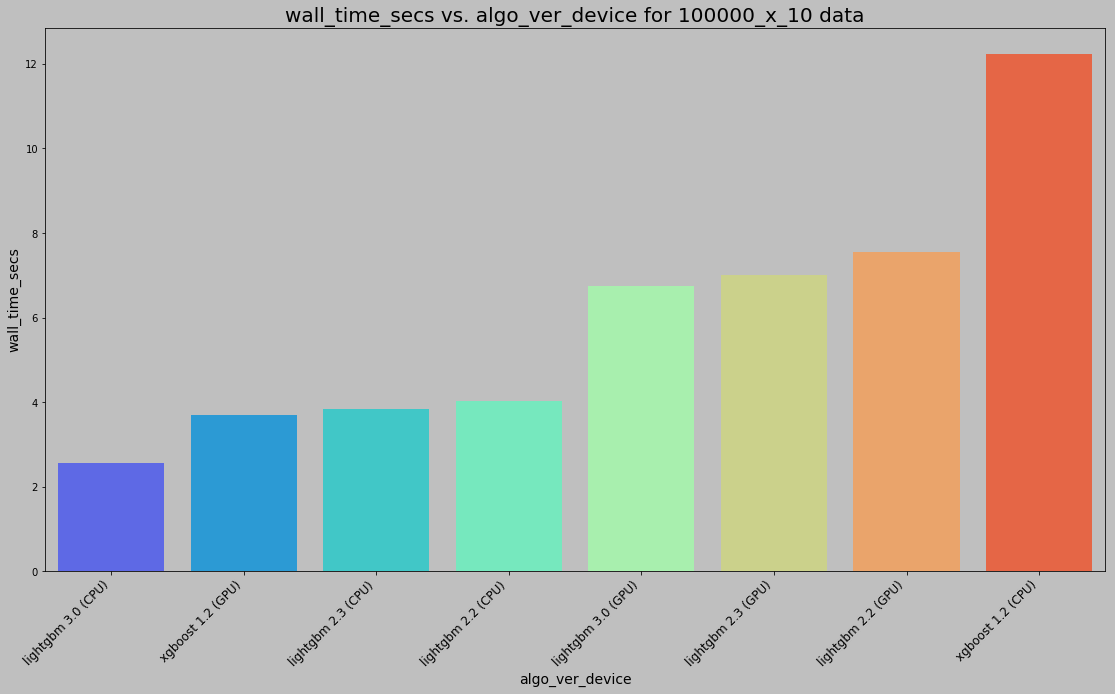

data_shape == "100000_x_10" :
                   wall_time_secs
algo_ver_device                  
lightgbm 3.0 (CPU)           2.56
xgboost 1.2 (GPU)            3.70
lightgbm 2.3 (CPU)           3.83
lightgbm 2.2 (CPU)           4.02
lightgbm 3.0 (GPU)           6.75
lightgbm 2.3 (GPU)           7.01
lightgbm 2.2 (GPU)           7.55
xgboost 1.2 (CPU)           12.24





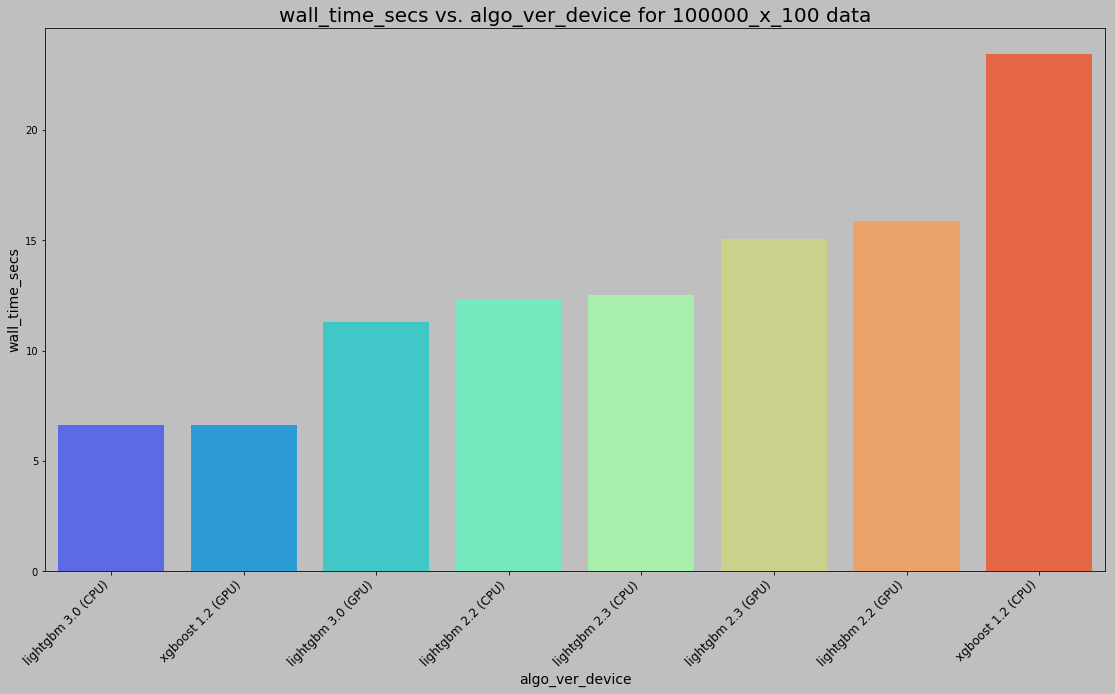

data_shape == "100000_x_100" :
                   wall_time_secs
algo_ver_device                  
lightgbm 3.0 (CPU)           6.64
xgboost 1.2 (GPU)            6.65
lightgbm 3.0 (GPU)          11.31
lightgbm 2.2 (CPU)          12.31
lightgbm 2.3 (CPU)          12.52
lightgbm 2.3 (GPU)          15.06
lightgbm 2.2 (GPU)          15.85
xgboost 1.2 (CPU)           23.46





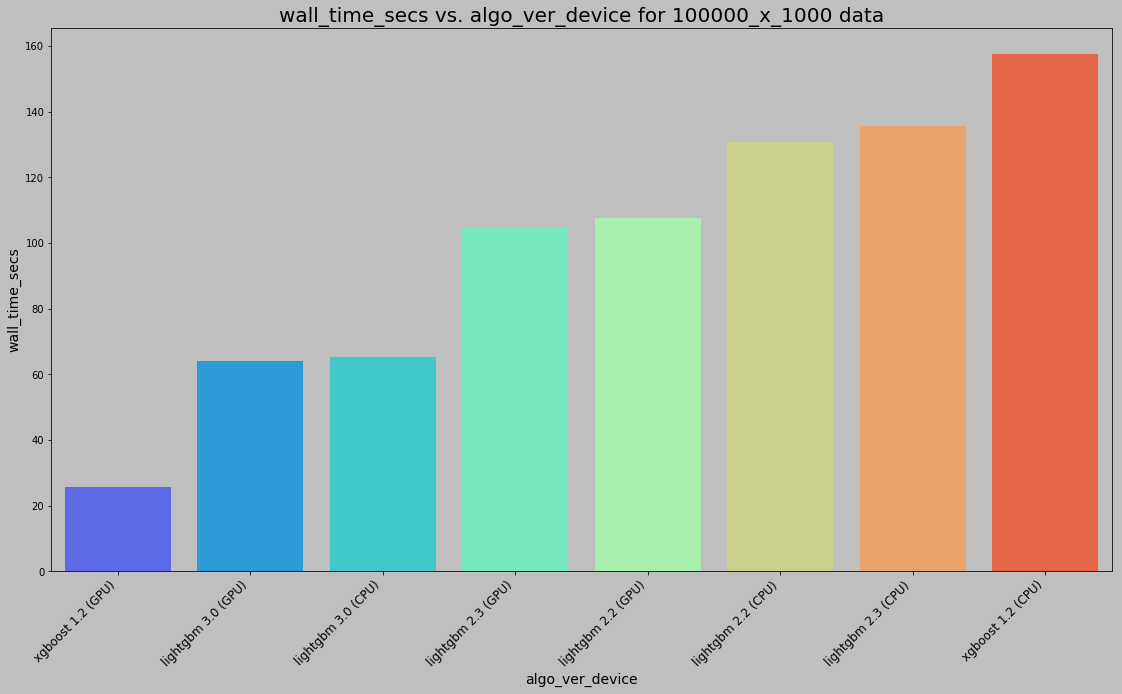

data_shape == "100000_x_1000" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)           25.61
lightgbm 3.0 (GPU)          64.18
lightgbm 3.0 (CPU)          65.41
lightgbm 2.3 (GPU)         104.67
lightgbm 2.2 (GPU)         107.68
lightgbm 2.2 (CPU)         130.71
lightgbm 2.3 (CPU)         135.68
xgboost 1.2 (CPU)          157.69





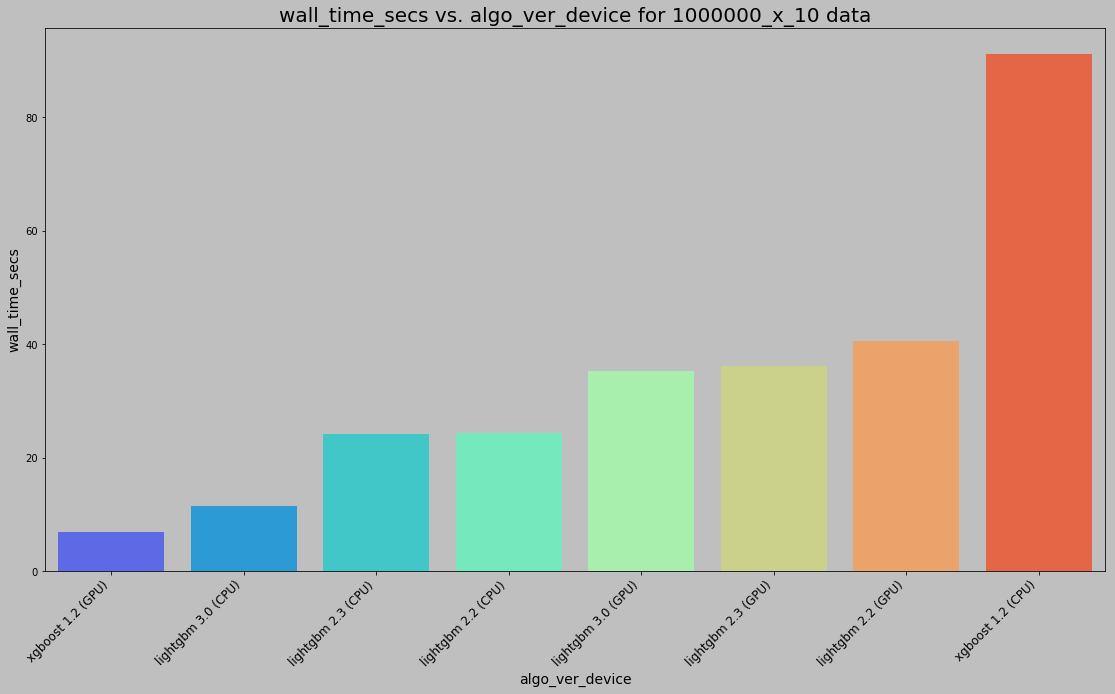

data_shape == "1000000_x_10" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)            6.98
lightgbm 3.0 (CPU)          11.44
lightgbm 2.3 (CPU)          24.18
lightgbm 2.2 (CPU)          24.45
lightgbm 3.0 (GPU)          35.29
lightgbm 2.3 (GPU)          36.12
lightgbm 2.2 (GPU)          40.54
xgboost 1.2 (CPU)           91.21





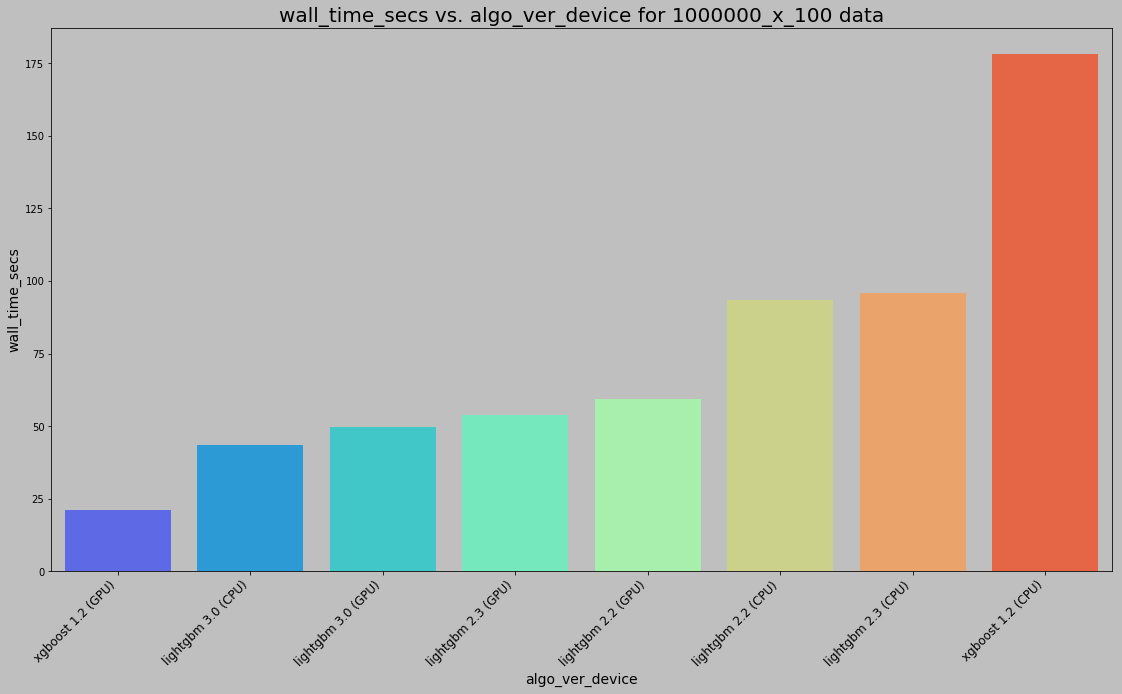

data_shape == "1000000_x_100" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)           21.10
lightgbm 3.0 (CPU)          43.57
lightgbm 3.0 (GPU)          49.61
lightgbm 2.3 (GPU)          53.89
lightgbm 2.2 (GPU)          59.49
lightgbm 2.2 (CPU)          93.54
lightgbm 2.3 (CPU)          95.72
xgboost 1.2 (CPU)          178.29





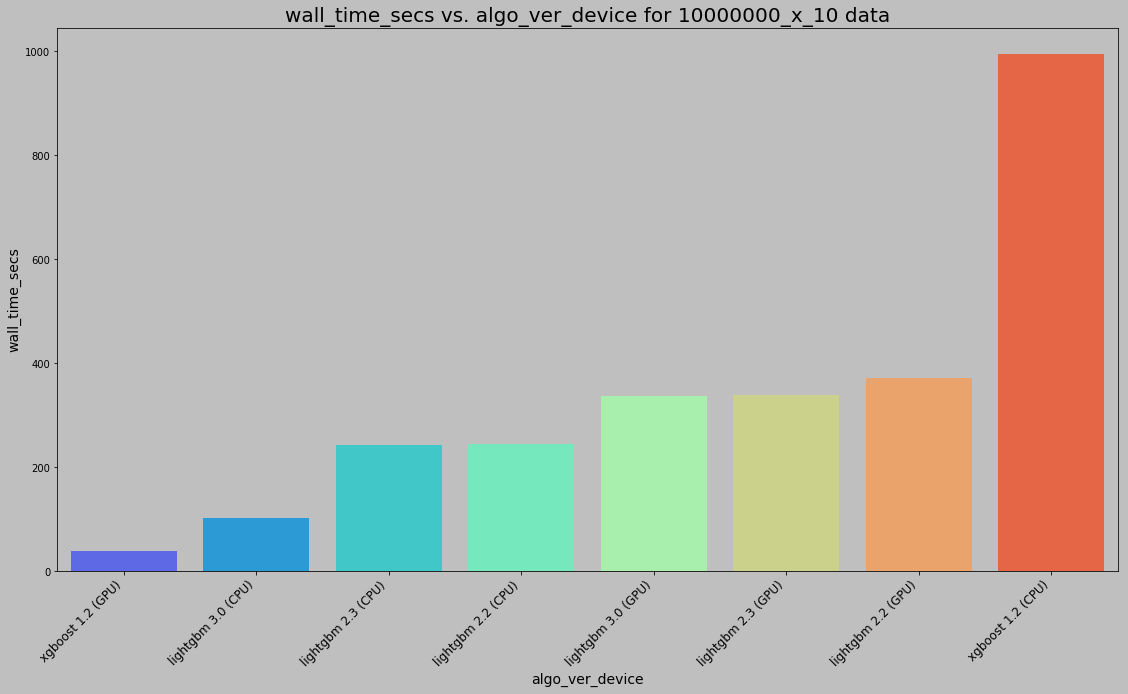

data_shape == "10000000_x_10" :
                   wall_time_secs
algo_ver_device                  
xgboost 1.2 (GPU)           39.44
lightgbm 3.0 (CPU)         102.63
lightgbm 2.3 (CPU)         242.05
lightgbm 2.2 (CPU)         245.56
lightgbm 3.0 (GPU)         336.75
lightgbm 2.3 (GPU)         338.62
lightgbm 2.2 (GPU)         372.33
xgboost 1.2 (CPU)          995.49





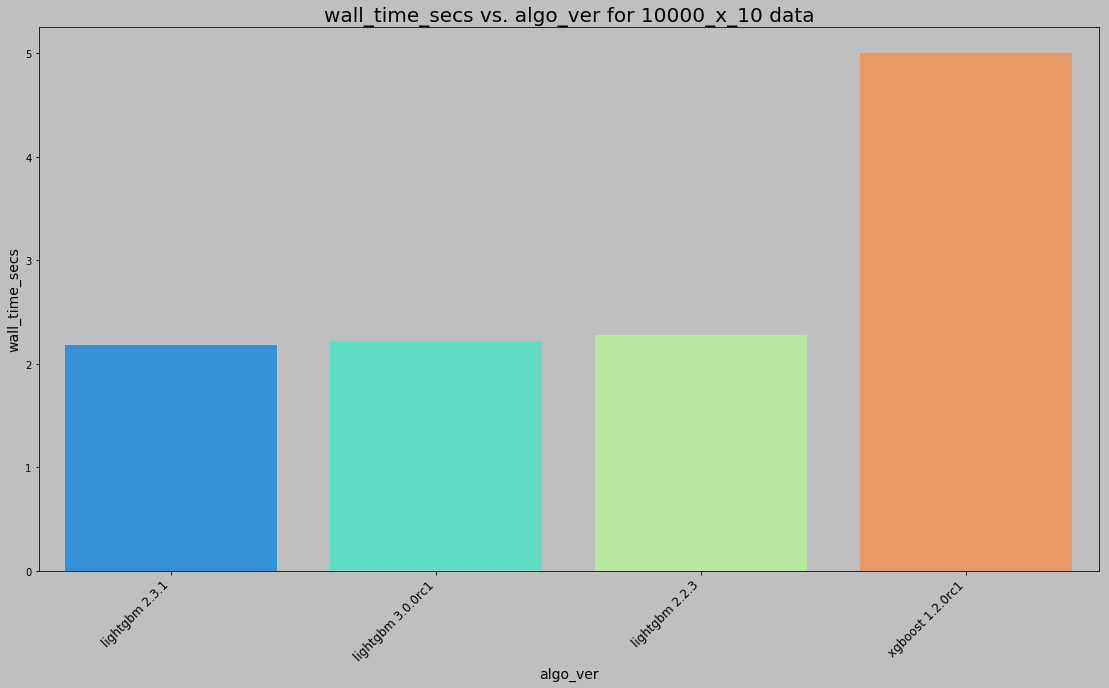

data_shape == "10000_x_10" :
                  wall_time_secs
algo_ver                        
lightgbm 2.3.1              2.18
lightgbm 3.0.0rc1           2.22
lightgbm 2.2.3              2.28
xgboost 1.2.0rc1            5.00





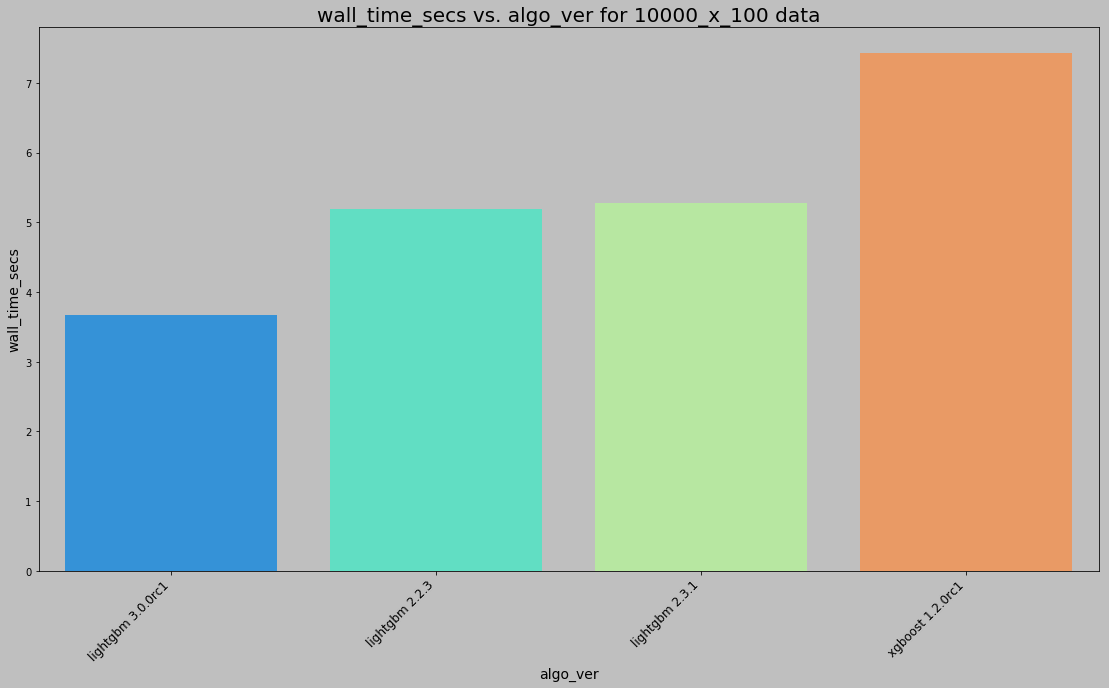

data_shape == "10000_x_100" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1           3.67
lightgbm 2.2.3              5.19
lightgbm 2.3.1              5.28
xgboost 1.2.0rc1            7.42





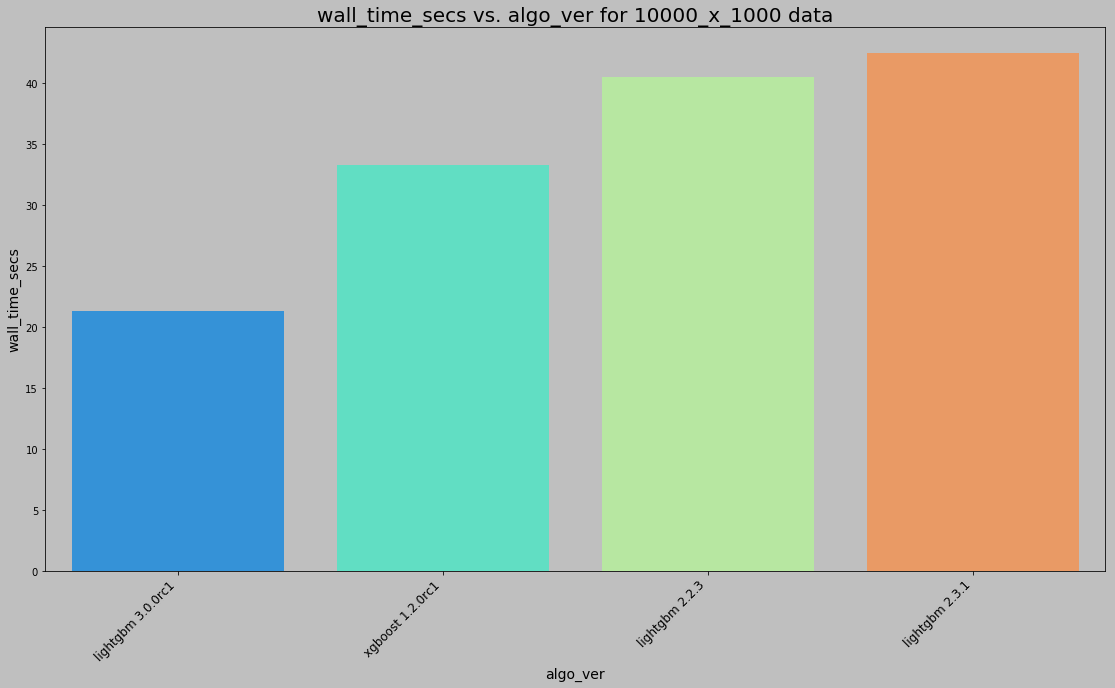

data_shape == "10000_x_1000" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1          21.33
xgboost 1.2.0rc1           33.29
lightgbm 2.2.3             40.46
lightgbm 2.3.1             42.43





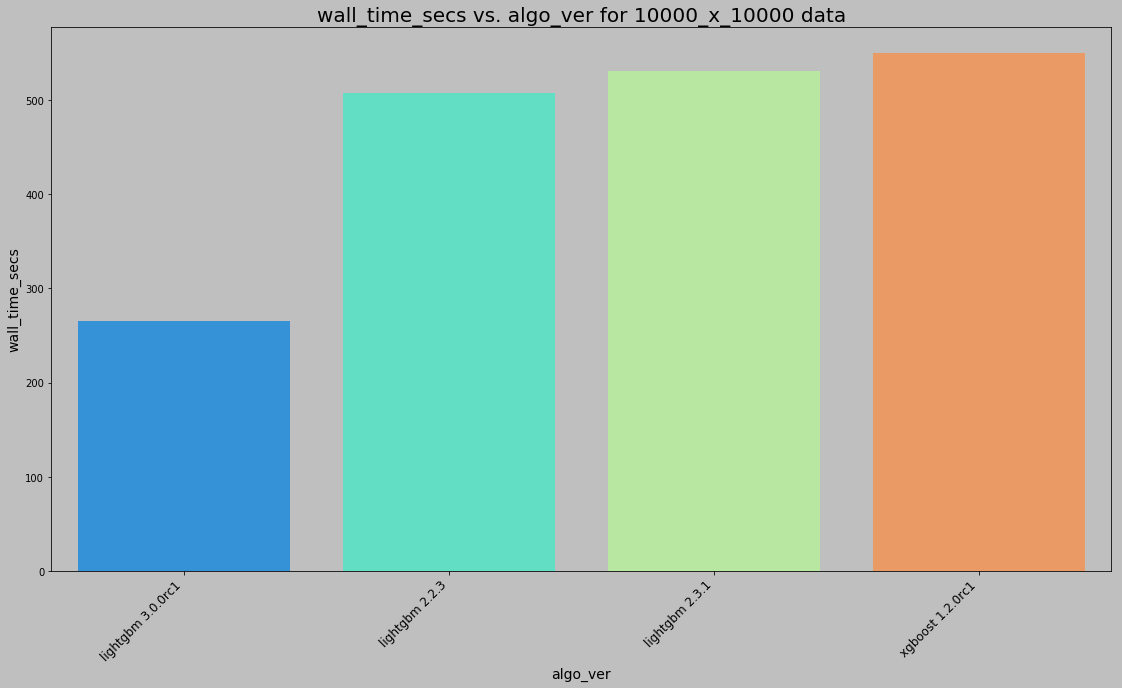

data_shape == "10000_x_10000" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1         265.12
lightgbm 2.2.3            506.95
lightgbm 2.3.1            530.44
xgboost 1.2.0rc1          549.68





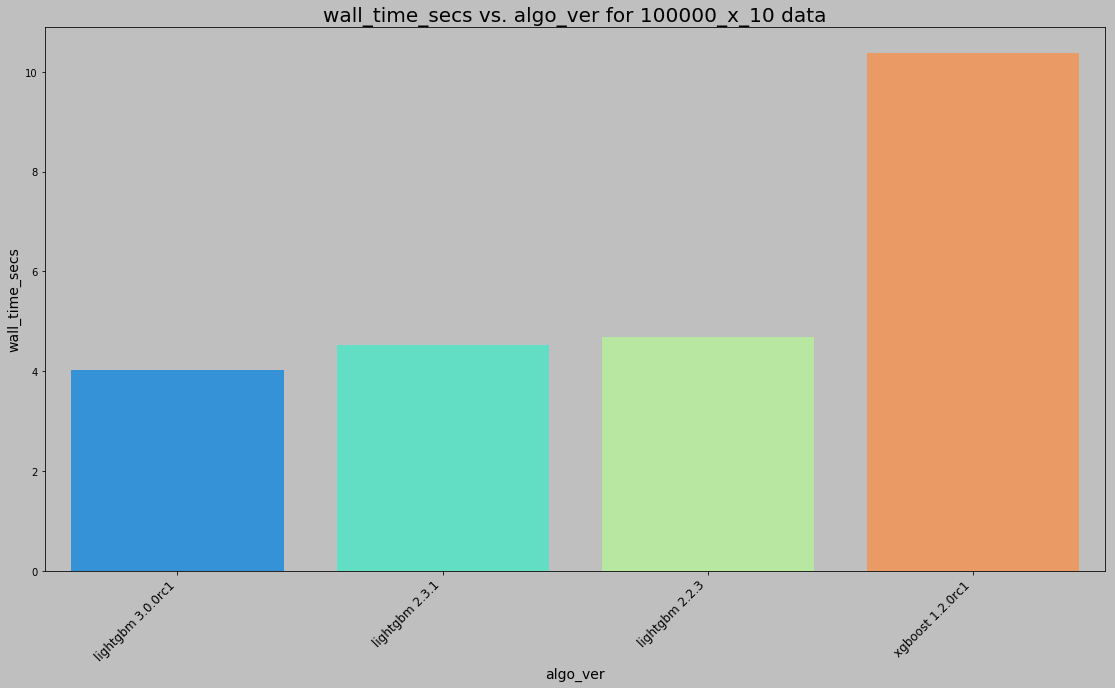

data_shape == "100000_x_10" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1           4.03
lightgbm 2.3.1              4.52
lightgbm 2.2.3              4.69
xgboost 1.2.0rc1           10.37





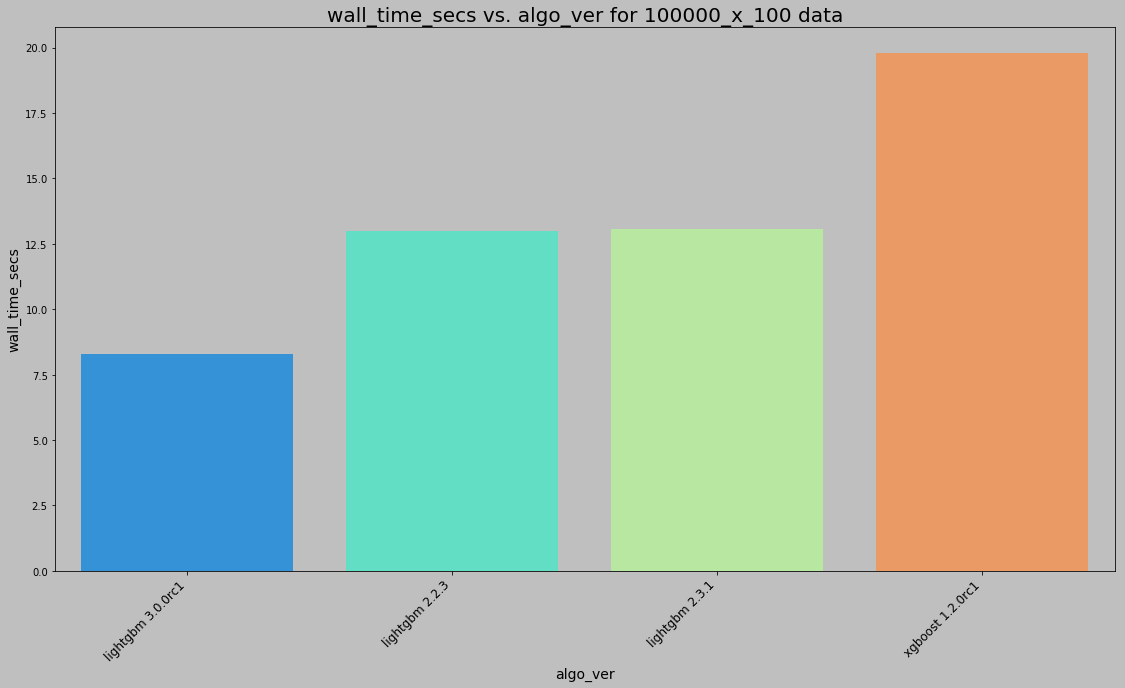

data_shape == "100000_x_100" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1           8.28
lightgbm 2.2.3             12.98
lightgbm 2.3.1             13.07
xgboost 1.2.0rc1           19.79





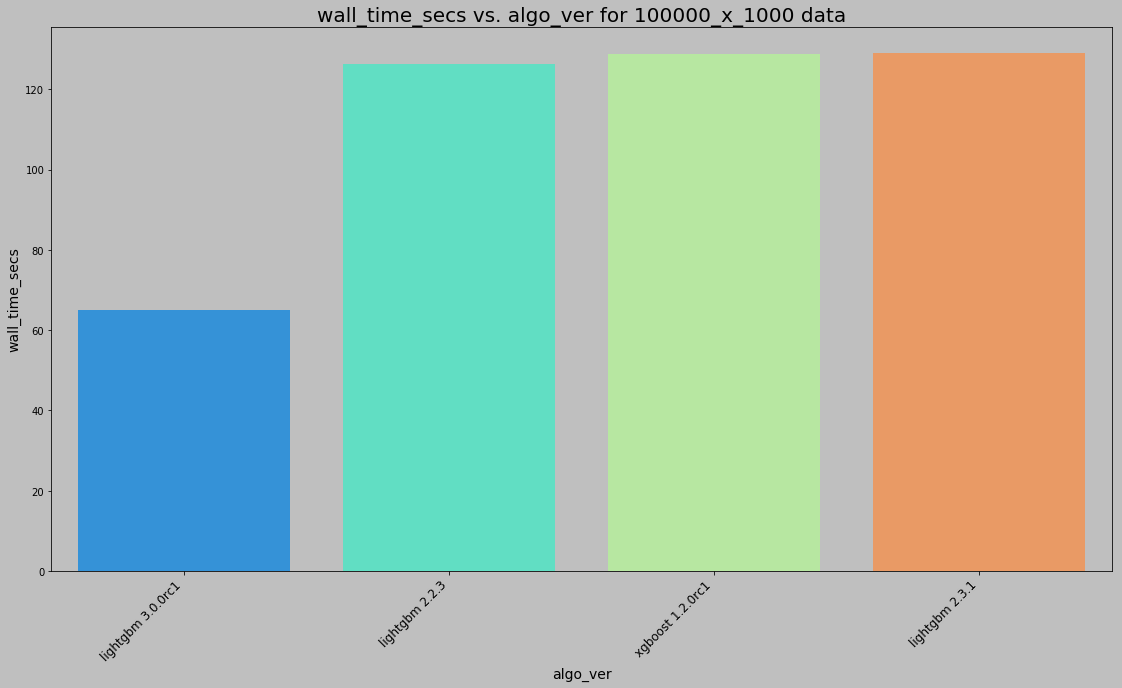

data_shape == "100000_x_1000" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1          64.98
lightgbm 2.2.3            126.36
xgboost 1.2.0rc1          128.90
lightgbm 2.3.1            129.01





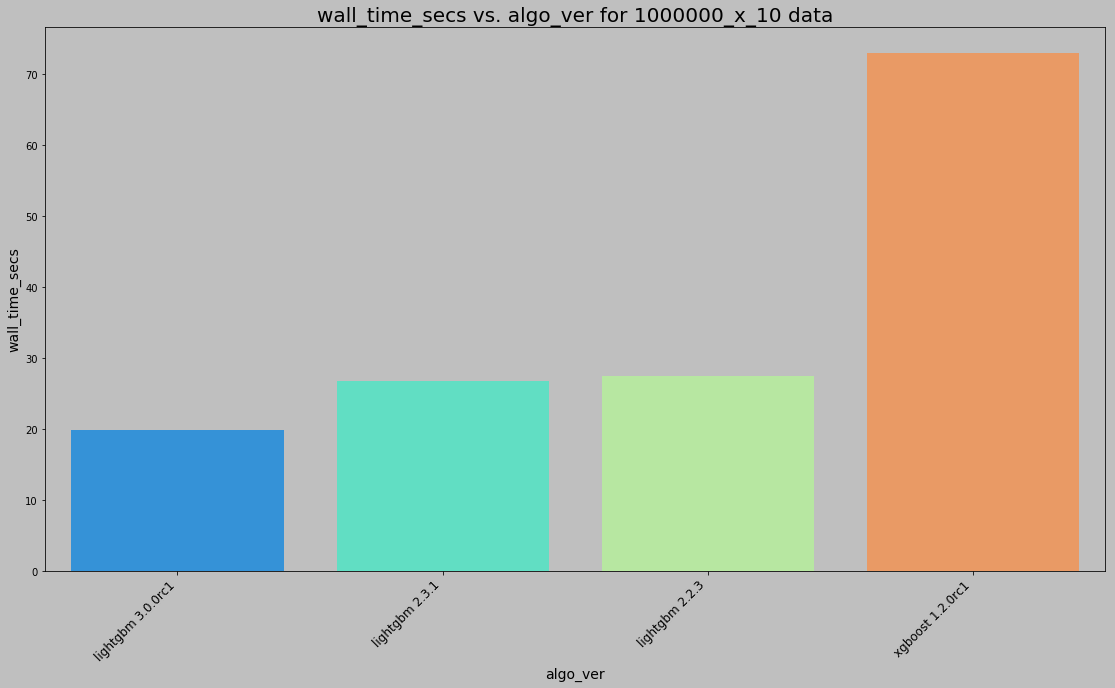

data_shape == "1000000_x_10" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1          19.79
lightgbm 2.3.1             26.74
lightgbm 2.2.3             27.49
xgboost 1.2.0rc1           72.90





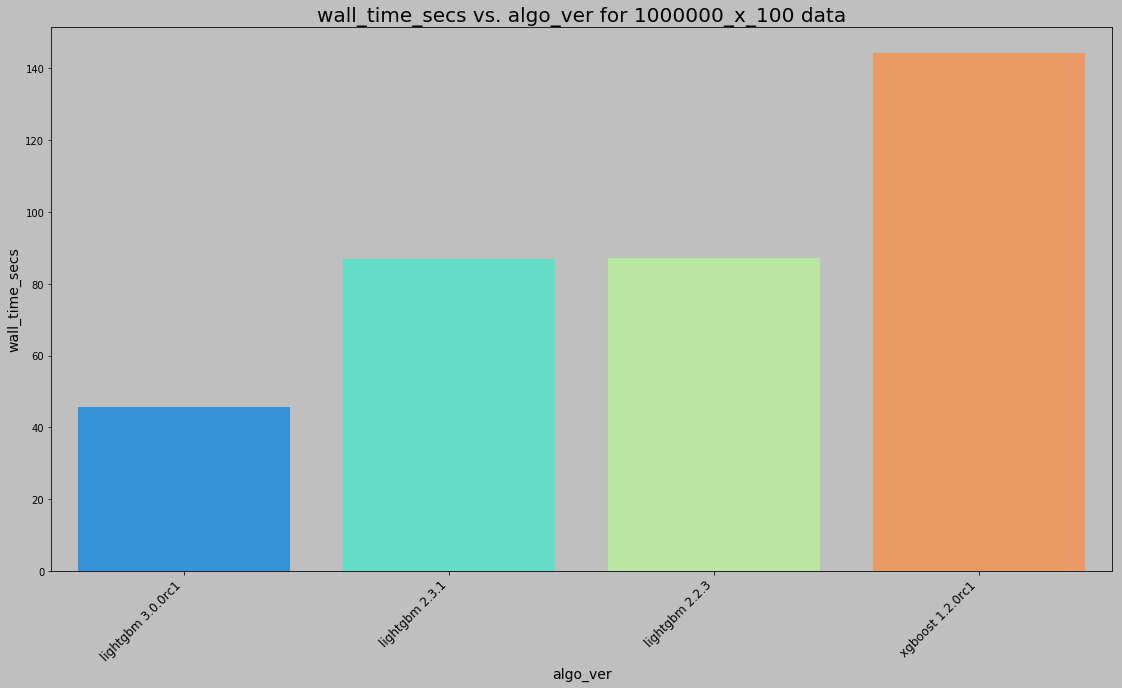

data_shape == "1000000_x_100" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1          45.68
lightgbm 2.3.1             86.78
lightgbm 2.2.3             87.10
xgboost 1.2.0rc1          144.22





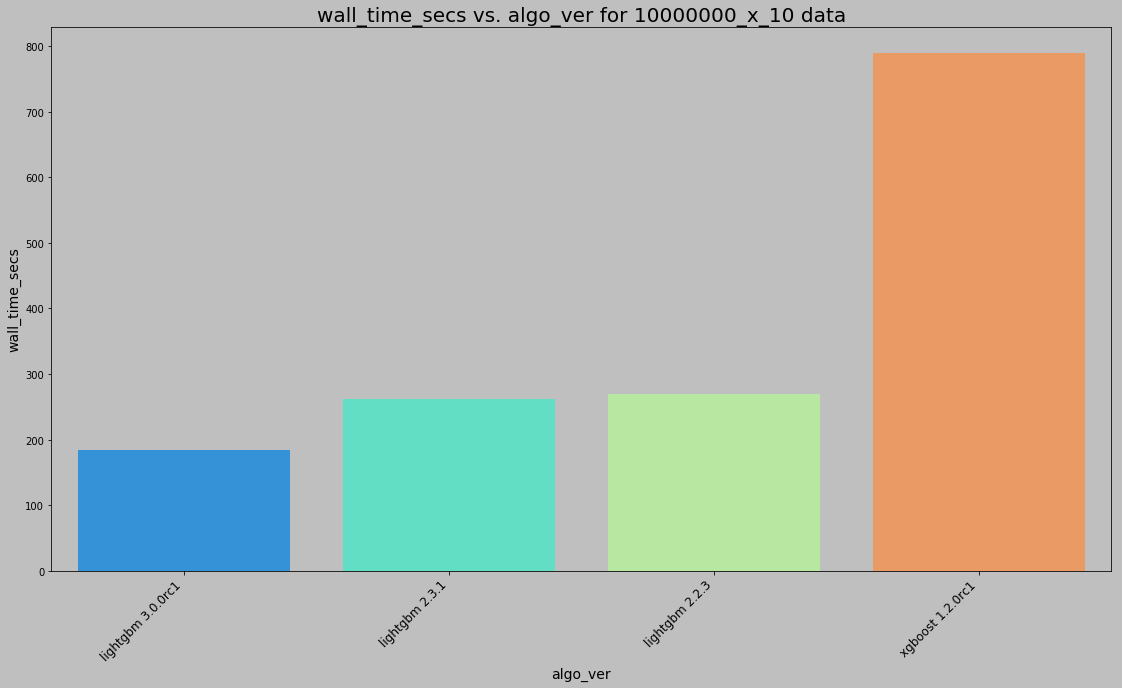

data_shape == "10000000_x_10" :
                  wall_time_secs
algo_ver                        
lightgbm 3.0.0rc1         184.25
lightgbm 2.3.1            262.61
lightgbm 2.2.3            269.55
xgboost 1.2.0rc1          789.08





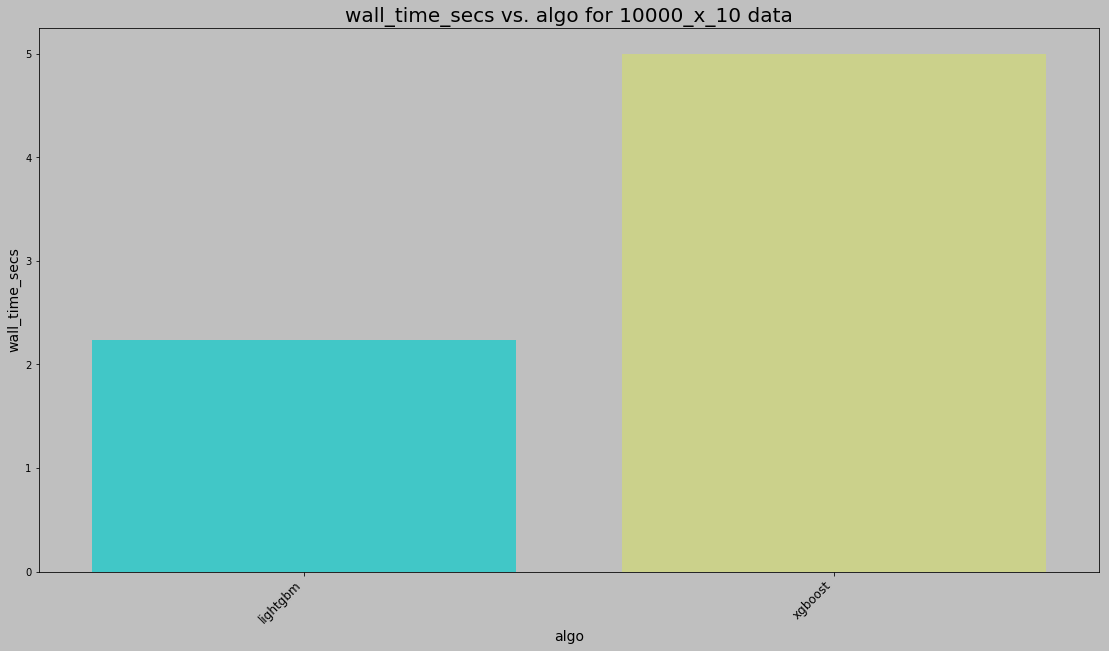

data_shape == "10000_x_10" :
         wall_time_secs
algo                   
lightgbm           2.23
xgboost            5.00





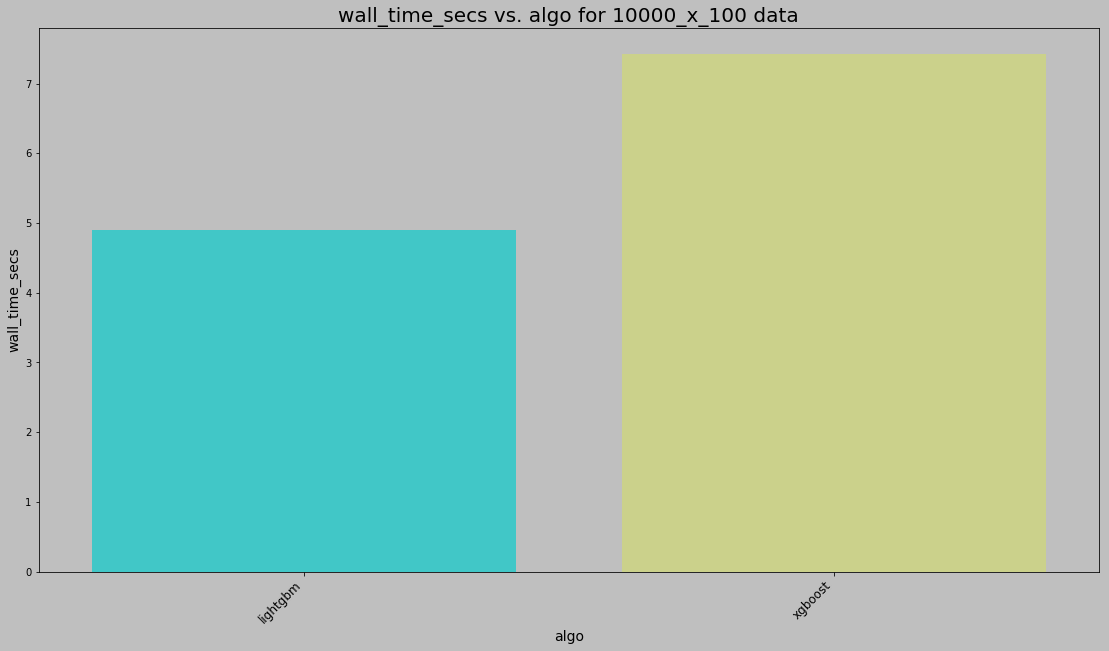

data_shape == "10000_x_100" :
         wall_time_secs
algo                   
lightgbm           4.91
xgboost            7.42





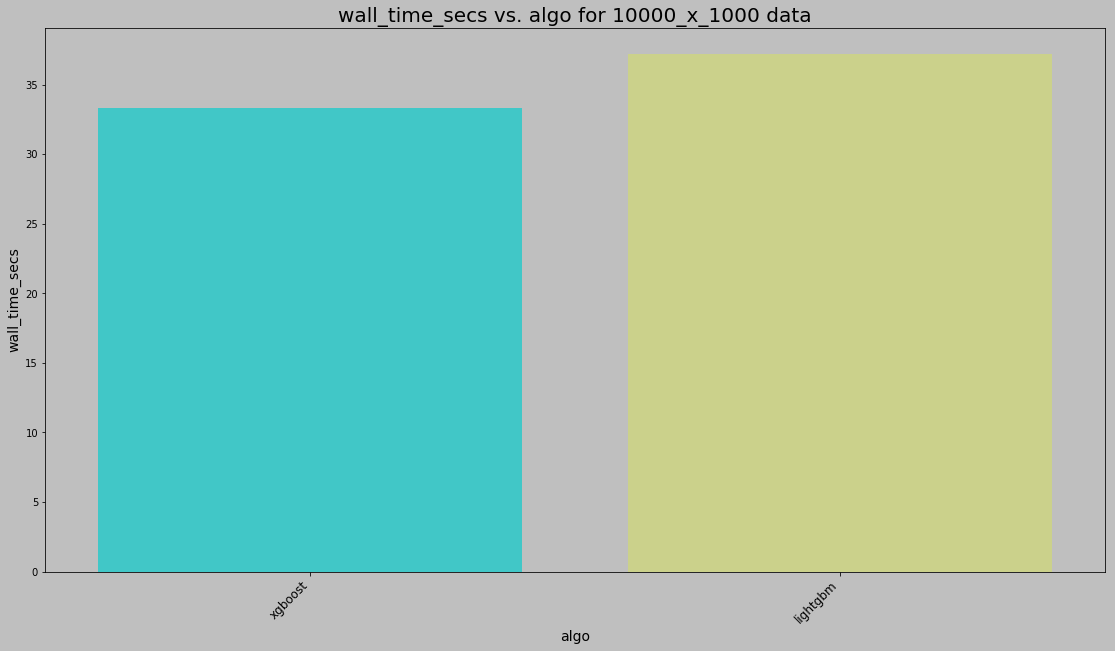

data_shape == "10000_x_1000" :
         wall_time_secs
algo                   
xgboost           33.29
lightgbm          37.21





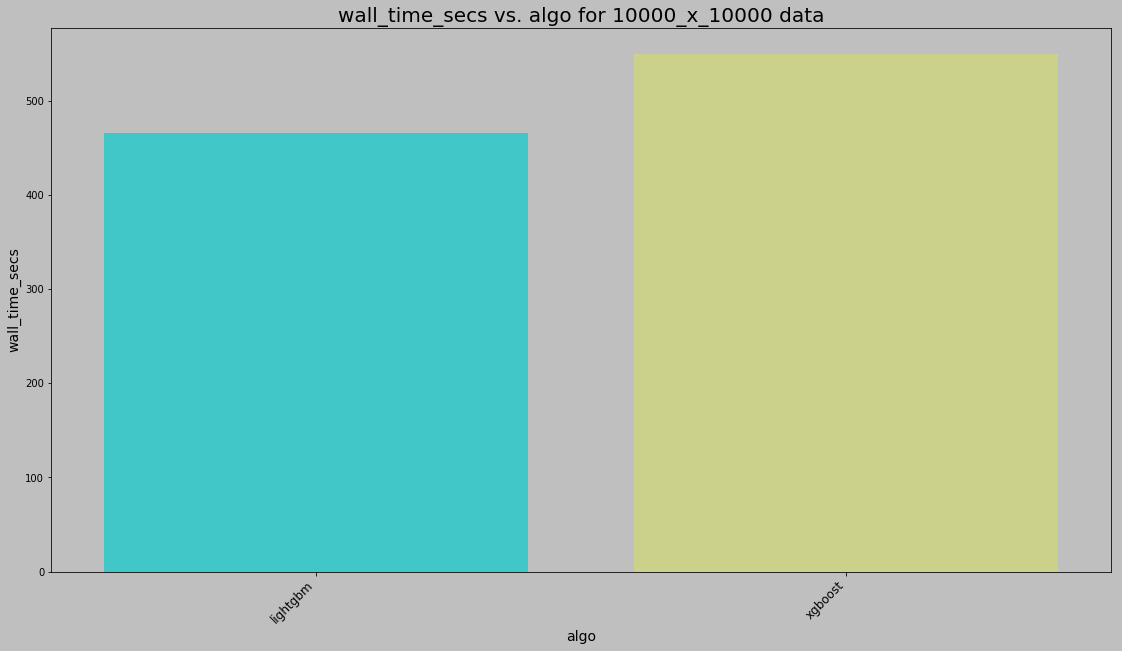

data_shape == "10000_x_10000" :
         wall_time_secs
algo                   
lightgbm         465.53
xgboost          549.68





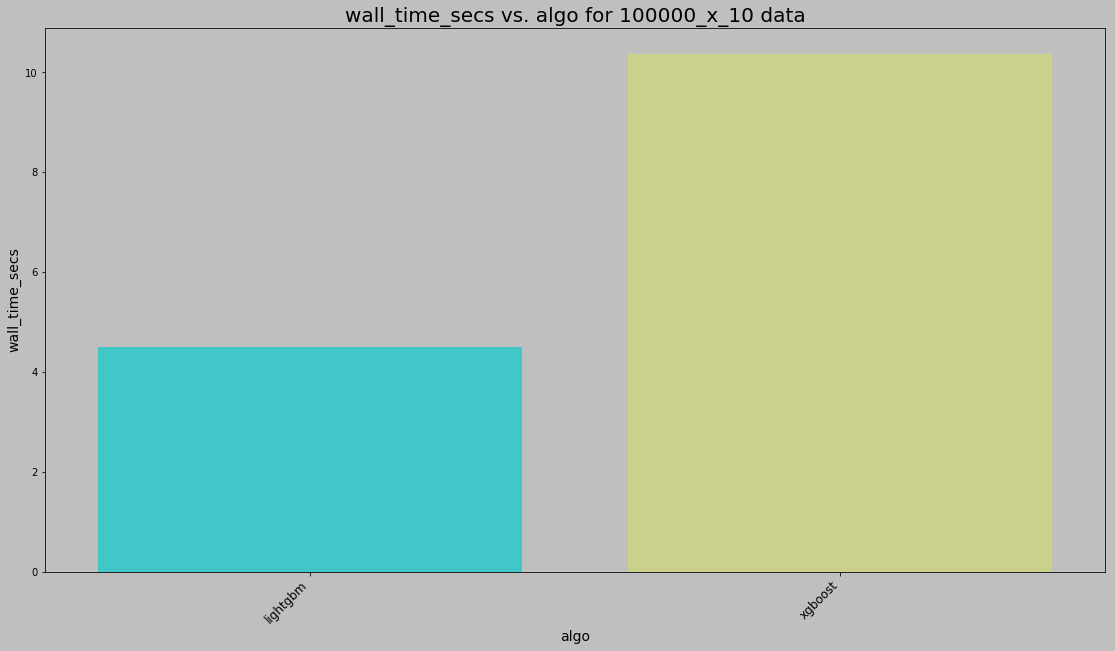

data_shape == "100000_x_10" :
         wall_time_secs
algo                   
lightgbm           4.50
xgboost           10.37





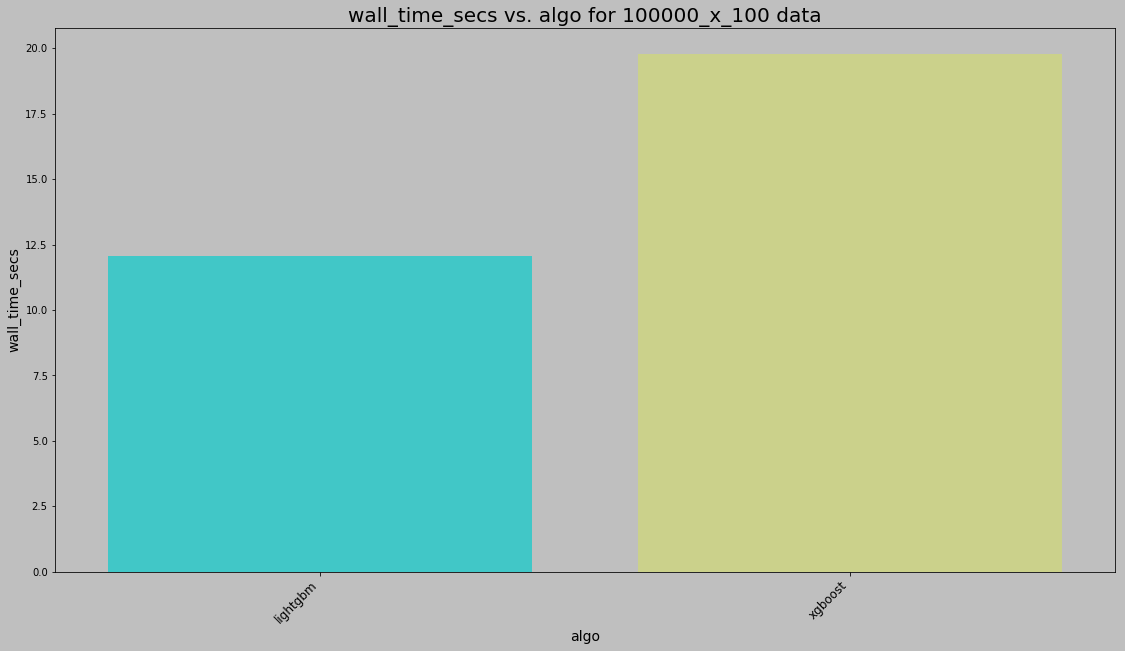

data_shape == "100000_x_100" :
         wall_time_secs
algo                   
lightgbm          12.06
xgboost           19.79





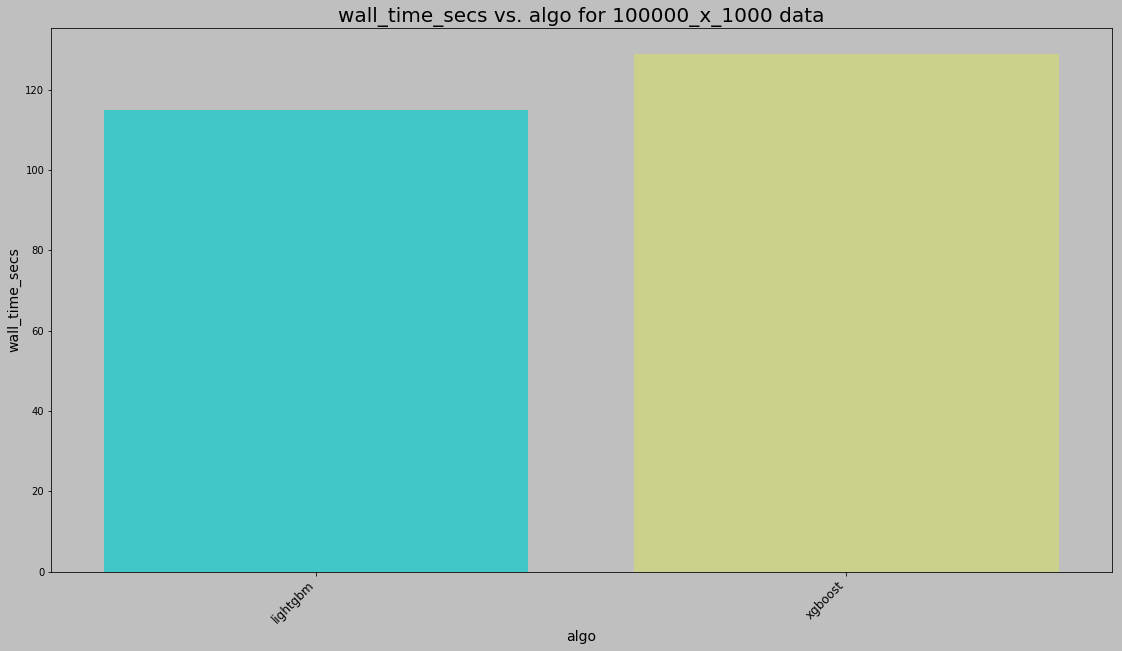

data_shape == "100000_x_1000" :
         wall_time_secs
algo                   
lightgbm         114.91
xgboost          128.90





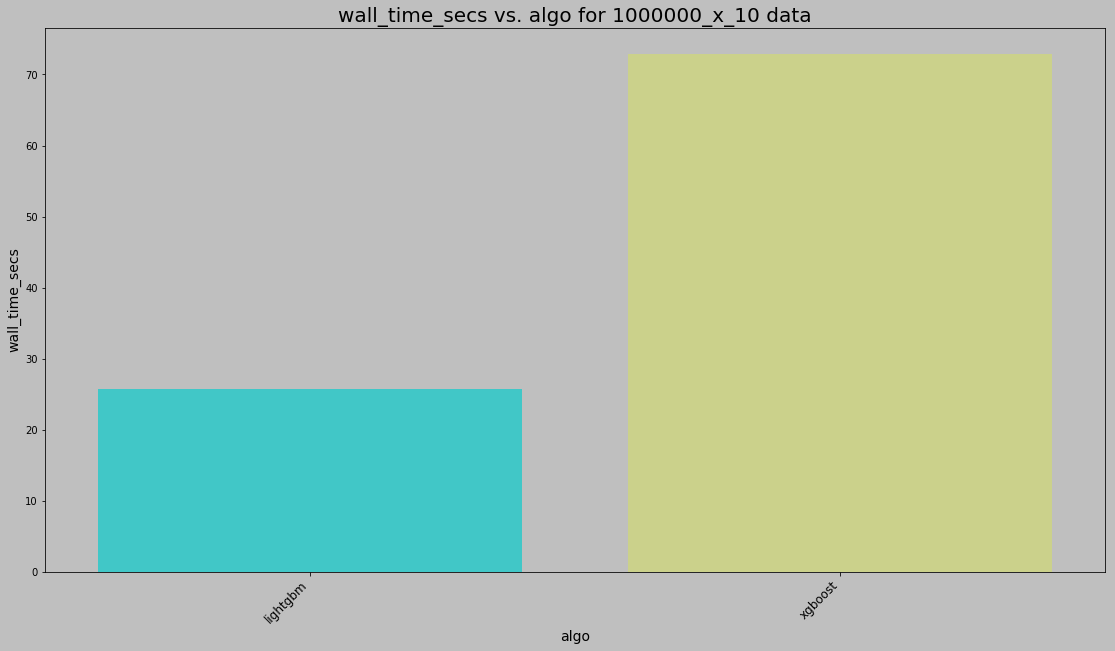

data_shape == "1000000_x_10" :
         wall_time_secs
algo                   
lightgbm          25.71
xgboost           72.90





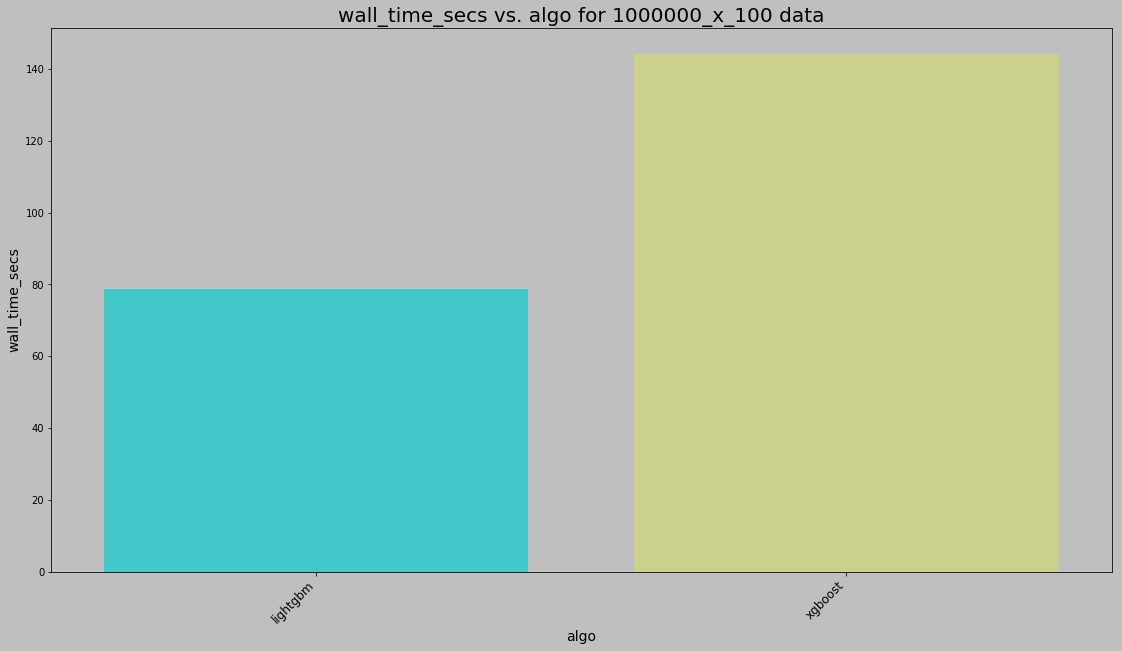

data_shape == "1000000_x_100" :
         wall_time_secs
algo                   
lightgbm          78.76
xgboost          144.22





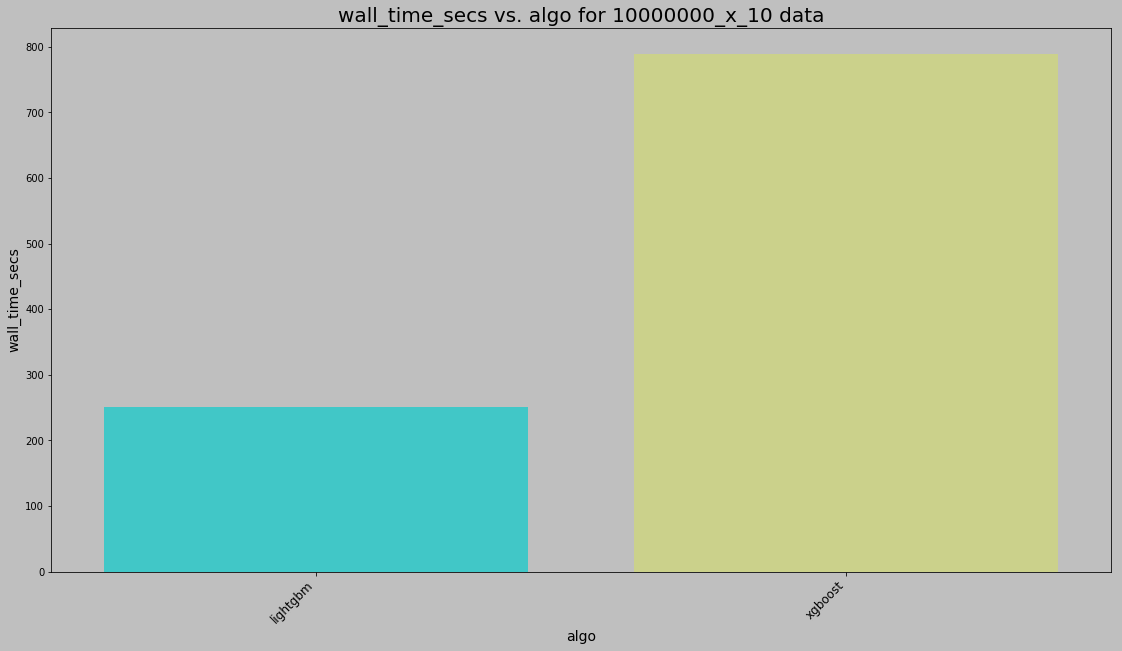

data_shape == "10000000_x_10" :
         wall_time_secs
algo                   
lightgbm         250.39
xgboost          789.08





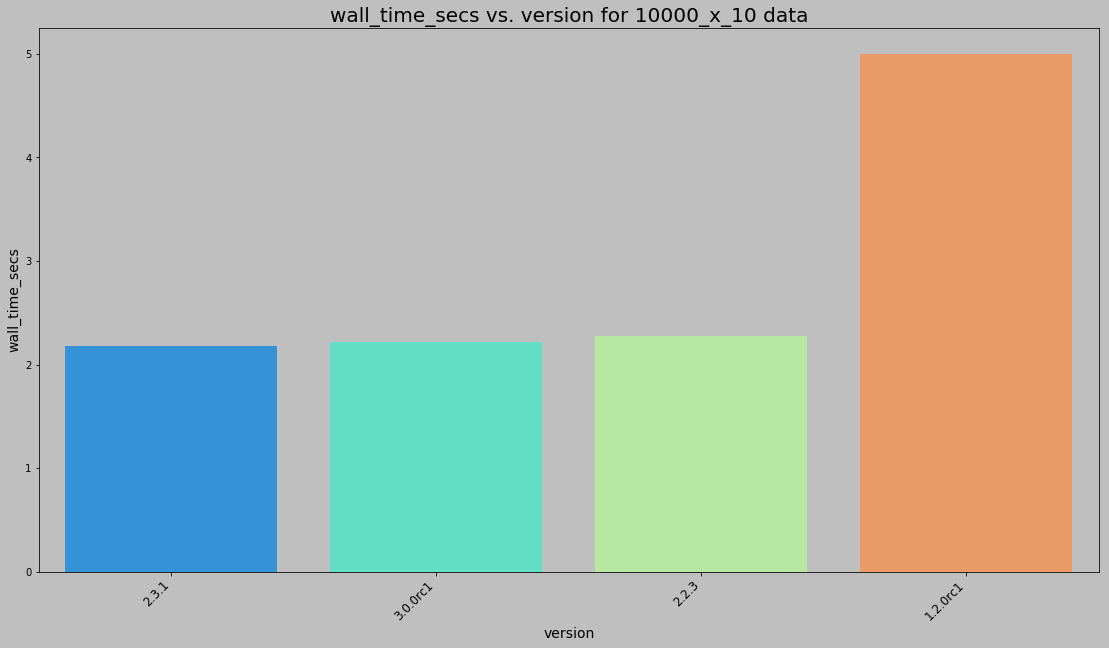

data_shape == "10000_x_10" :
         wall_time_secs
version                
2.3.1              2.18
3.0.0rc1           2.22
2.2.3              2.28
1.2.0rc1           5.00





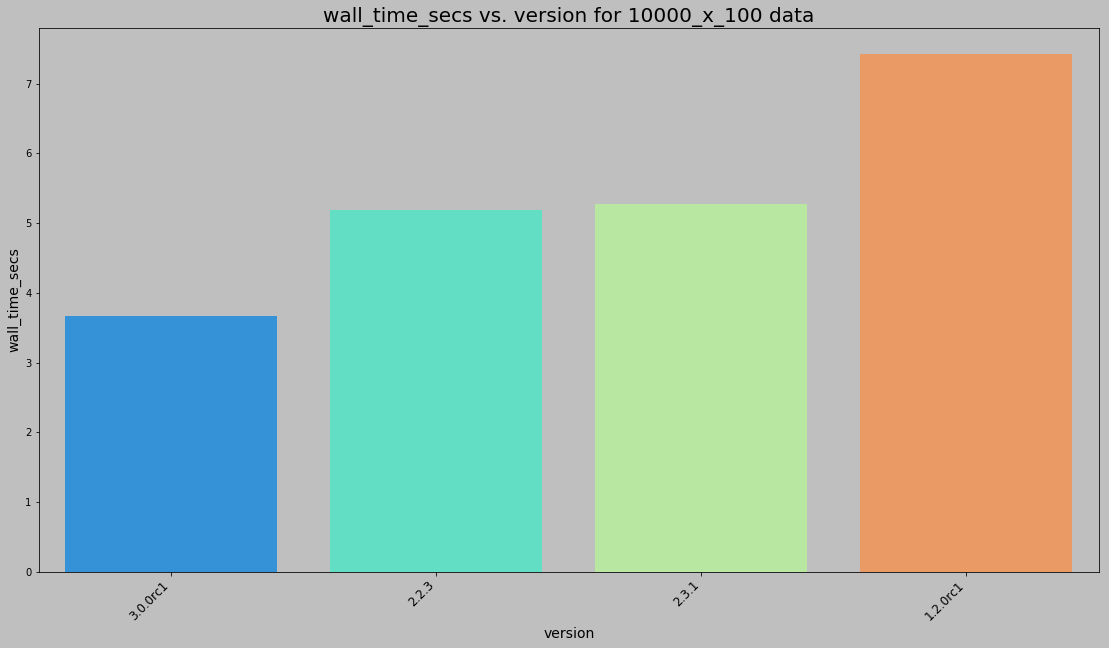

data_shape == "10000_x_100" :
         wall_time_secs
version                
3.0.0rc1           3.67
2.2.3              5.19
2.3.1              5.28
1.2.0rc1           7.42





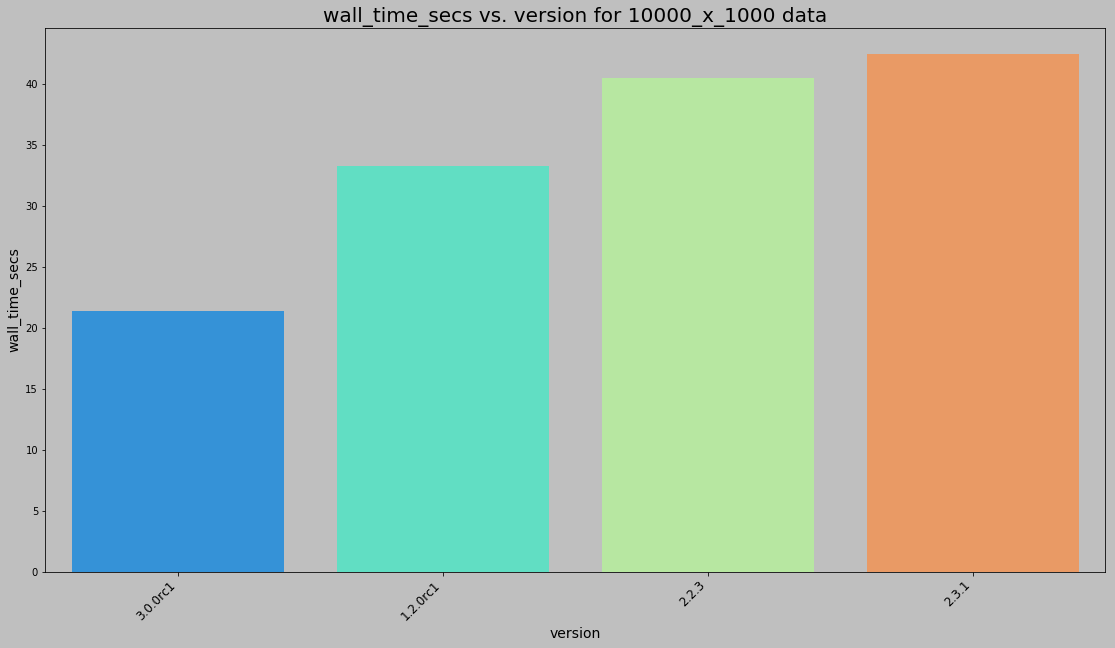

data_shape == "10000_x_1000" :
         wall_time_secs
version                
3.0.0rc1          21.33
1.2.0rc1          33.29
2.2.3             40.46
2.3.1             42.43





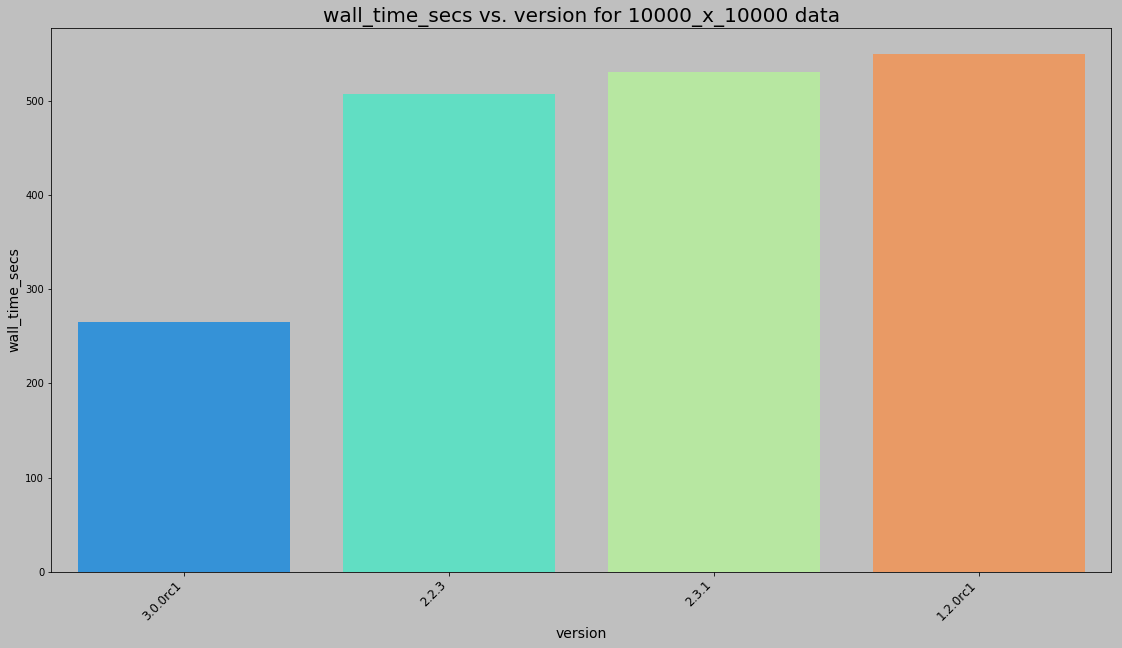

data_shape == "10000_x_10000" :
         wall_time_secs
version                
3.0.0rc1         265.12
2.2.3            506.95
2.3.1            530.44
1.2.0rc1         549.68





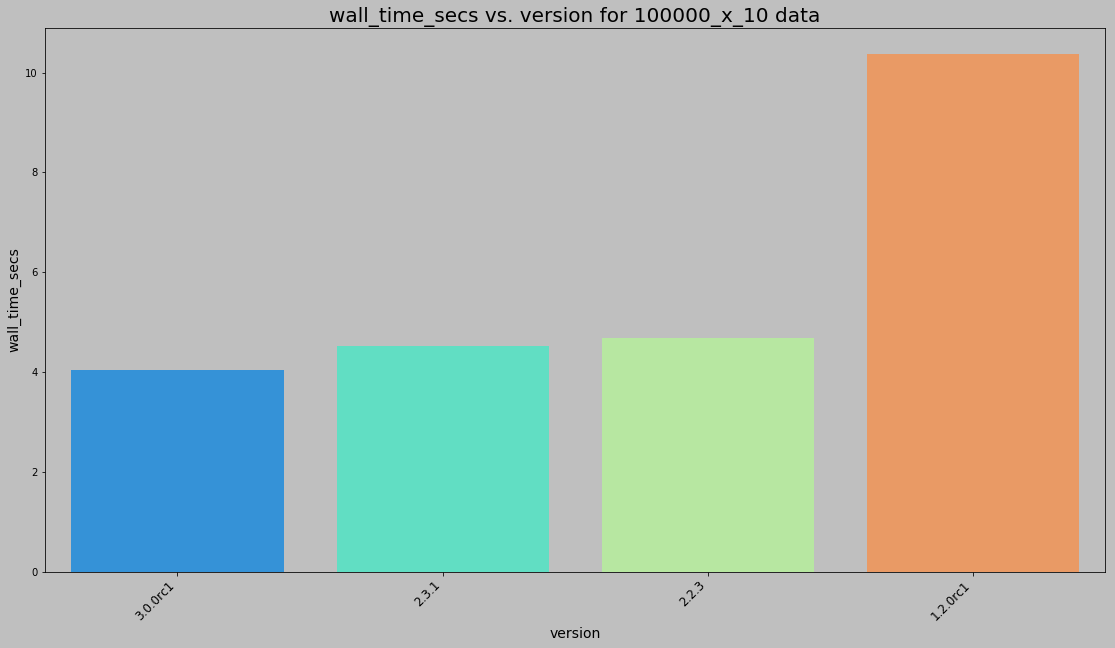

data_shape == "100000_x_10" :
         wall_time_secs
version                
3.0.0rc1           4.03
2.3.1              4.52
2.2.3              4.69
1.2.0rc1          10.37





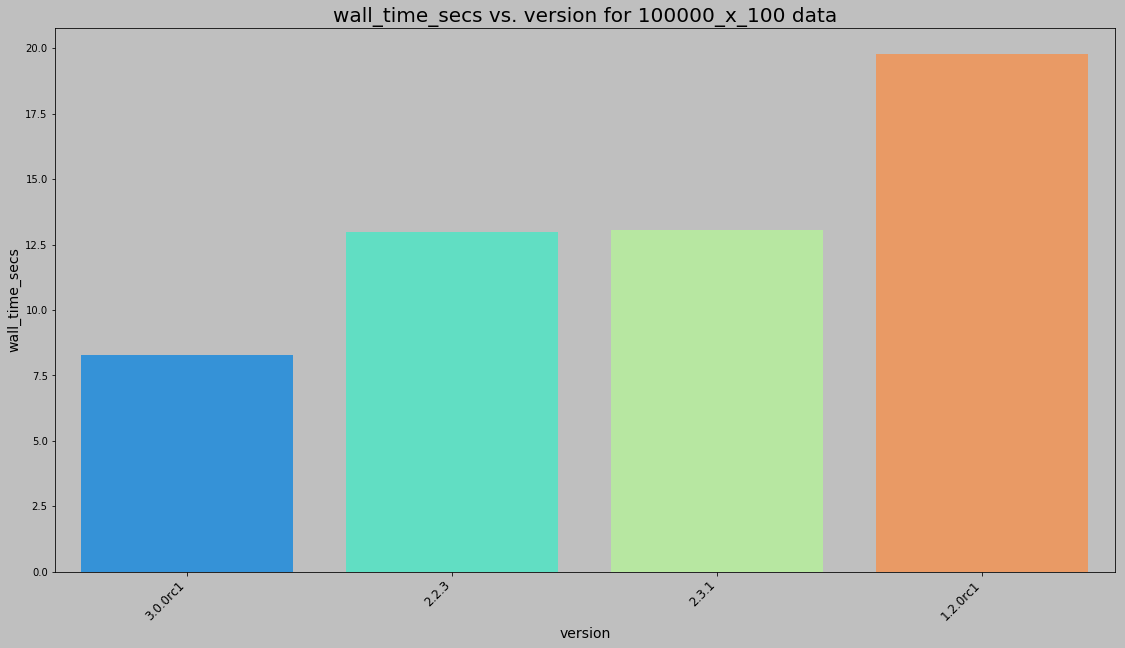

data_shape == "100000_x_100" :
         wall_time_secs
version                
3.0.0rc1           8.28
2.2.3             12.98
2.3.1             13.07
1.2.0rc1          19.79





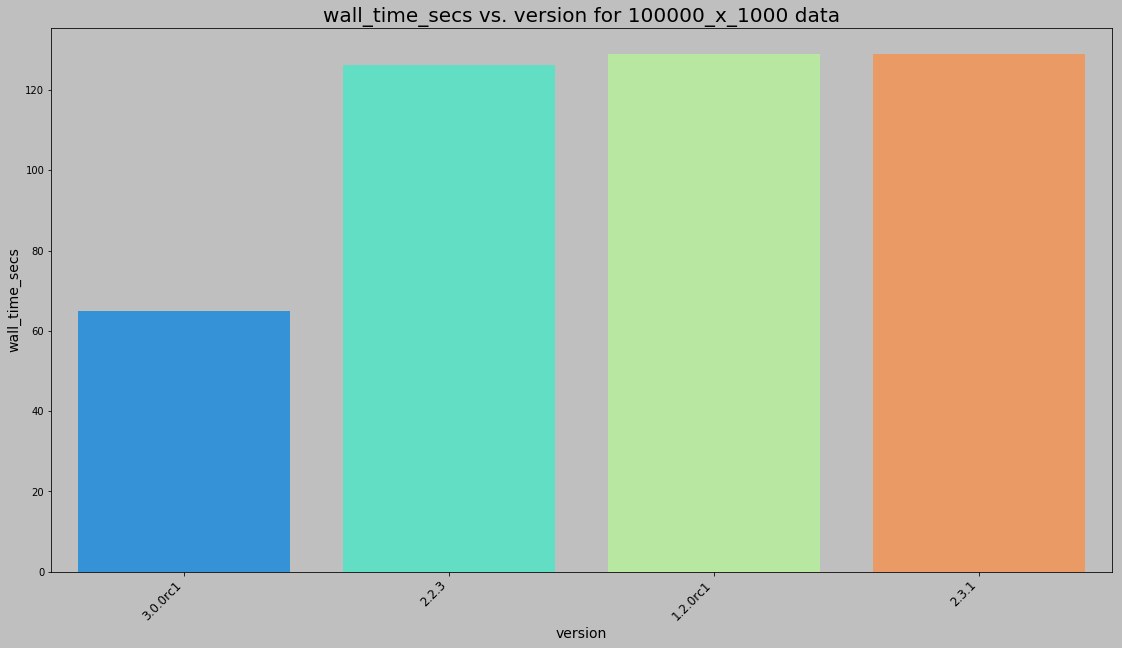

data_shape == "100000_x_1000" :
         wall_time_secs
version                
3.0.0rc1          64.98
2.2.3            126.36
1.2.0rc1         128.90
2.3.1            129.01





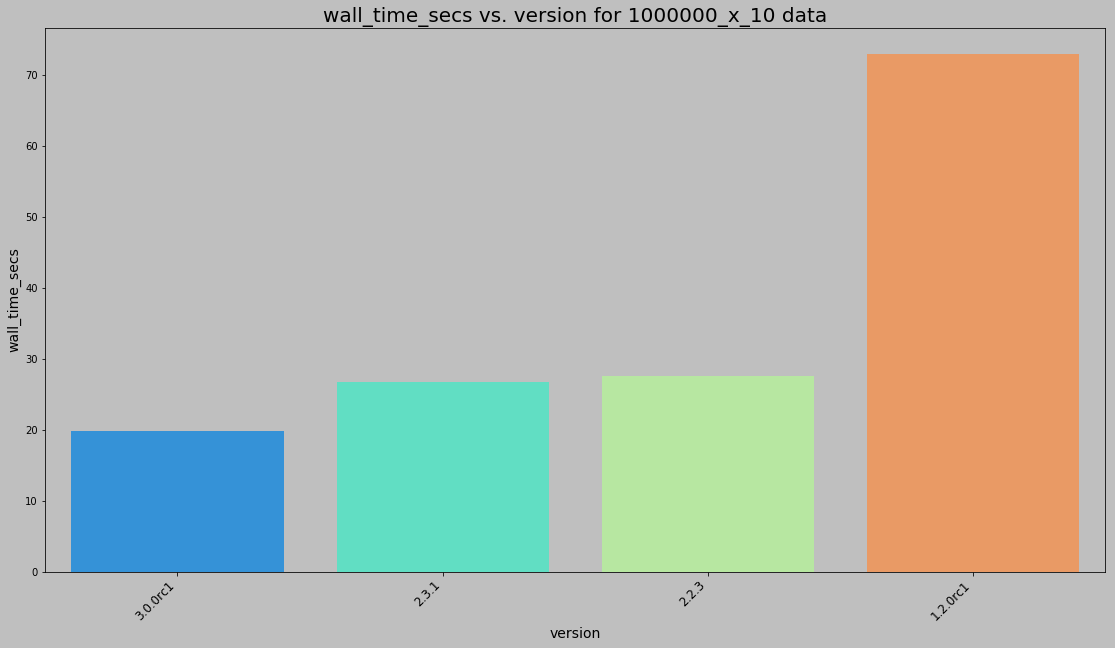

data_shape == "1000000_x_10" :
         wall_time_secs
version                
3.0.0rc1          19.79
2.3.1             26.74
2.2.3             27.49
1.2.0rc1          72.90





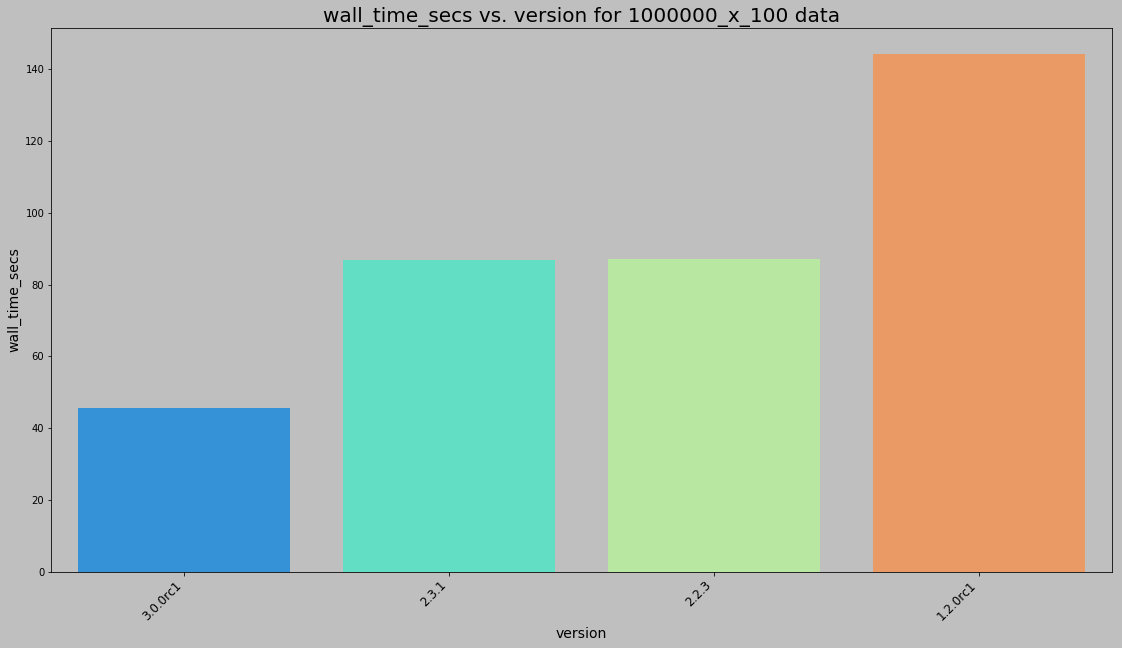

data_shape == "1000000_x_100" :
         wall_time_secs
version                
3.0.0rc1          45.68
2.3.1             86.78
2.2.3             87.10
1.2.0rc1         144.22





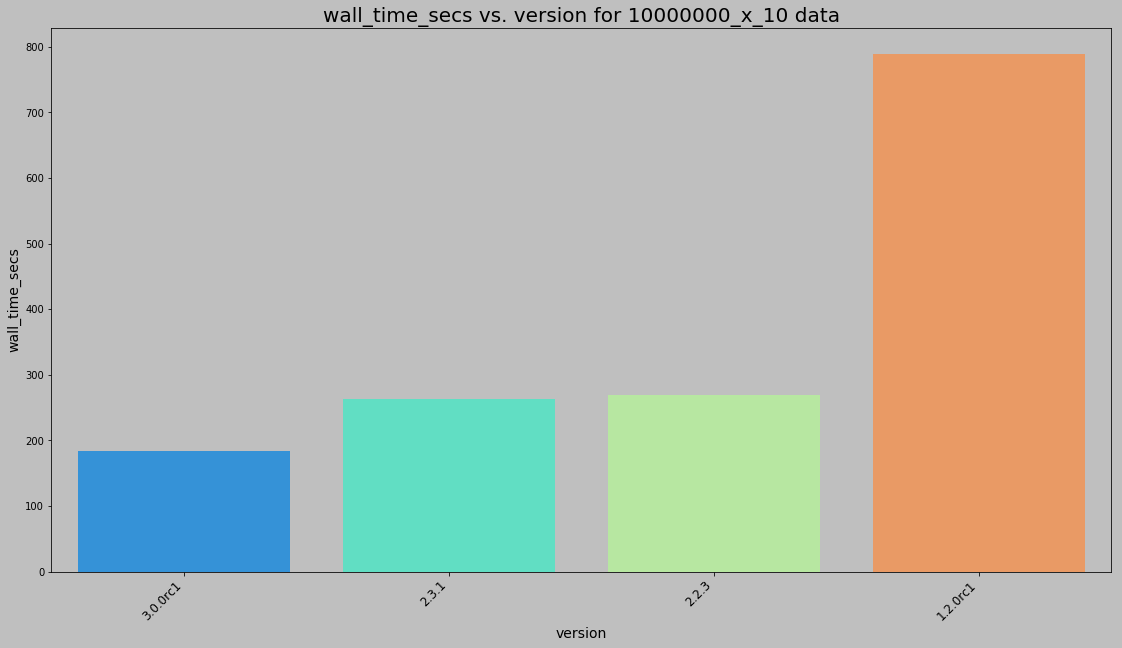

data_shape == "10000000_x_10" :
         wall_time_secs
version                
3.0.0rc1         184.25
2.3.1            262.61
2.2.3            269.55
1.2.0rc1         789.08





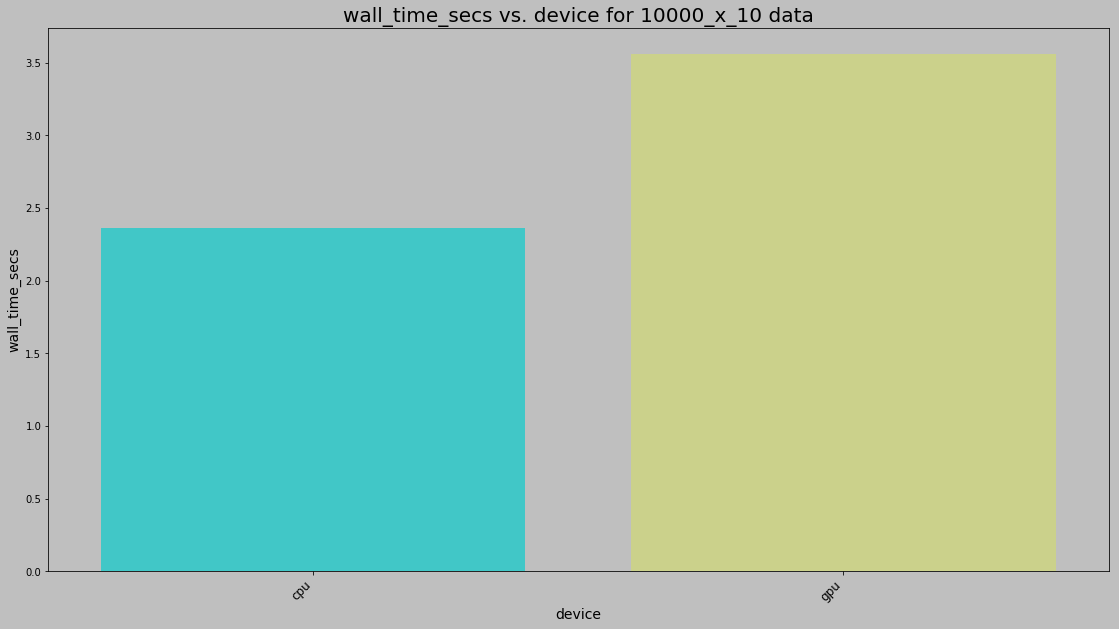

data_shape == "10000_x_10" :
       wall_time_secs
device               
cpu              2.36
gpu              3.56





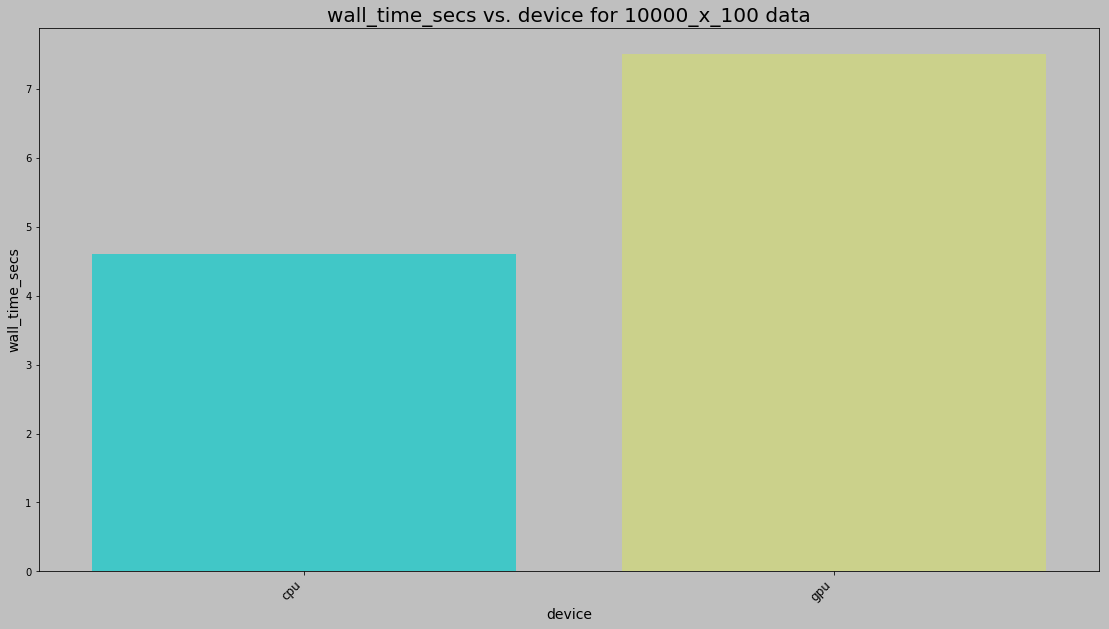

data_shape == "10000_x_100" :
       wall_time_secs
device               
cpu              4.60
gpu              7.51





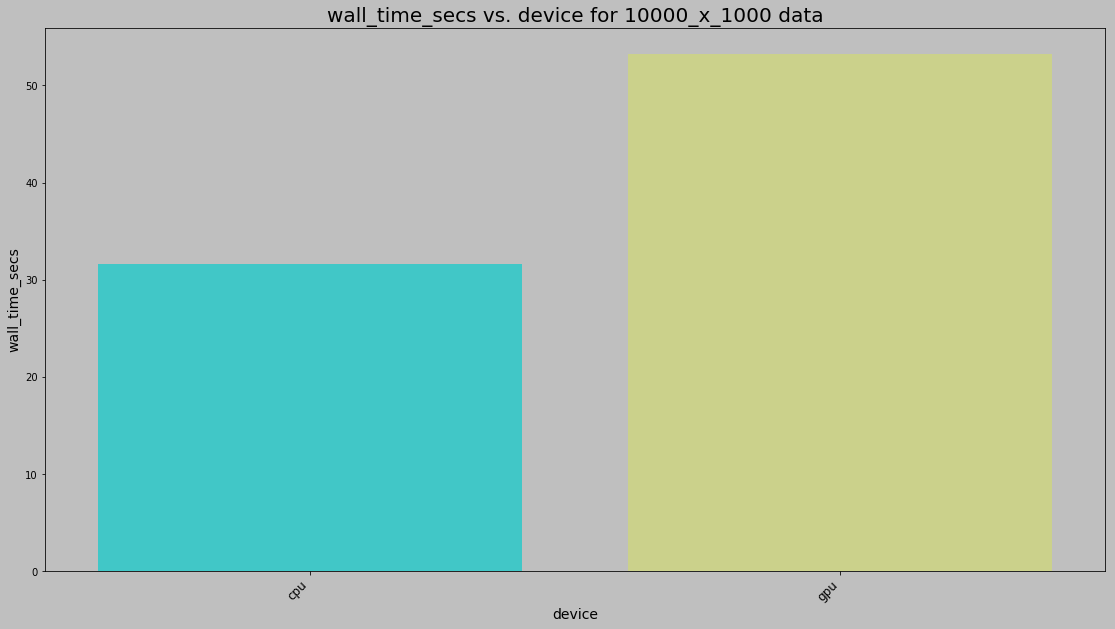

data_shape == "10000_x_1000" :
       wall_time_secs
device               
cpu             31.67
gpu             53.25





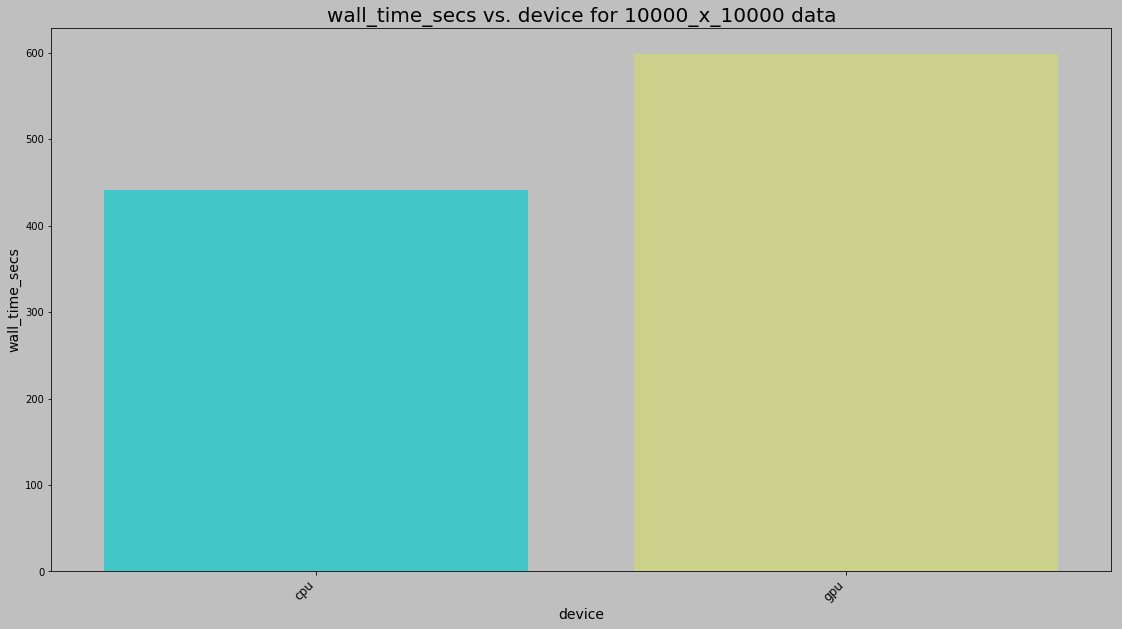

data_shape == "10000_x_10000" :
       wall_time_secs
device               
cpu            441.55
gpu            598.76





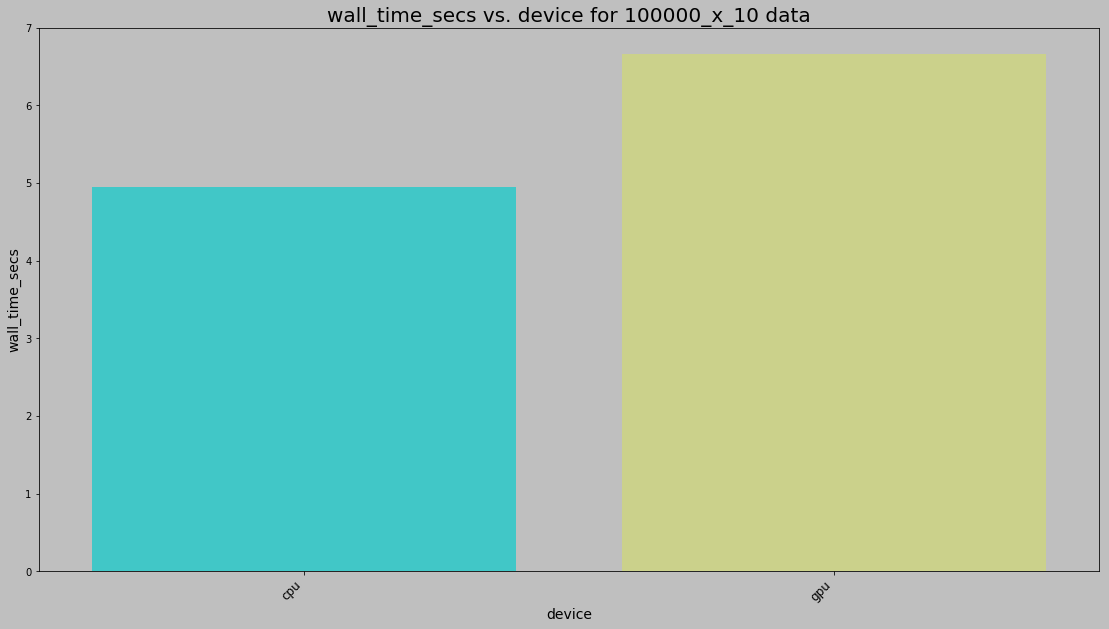

data_shape == "100000_x_10" :
       wall_time_secs
device               
cpu              4.95
gpu              6.67





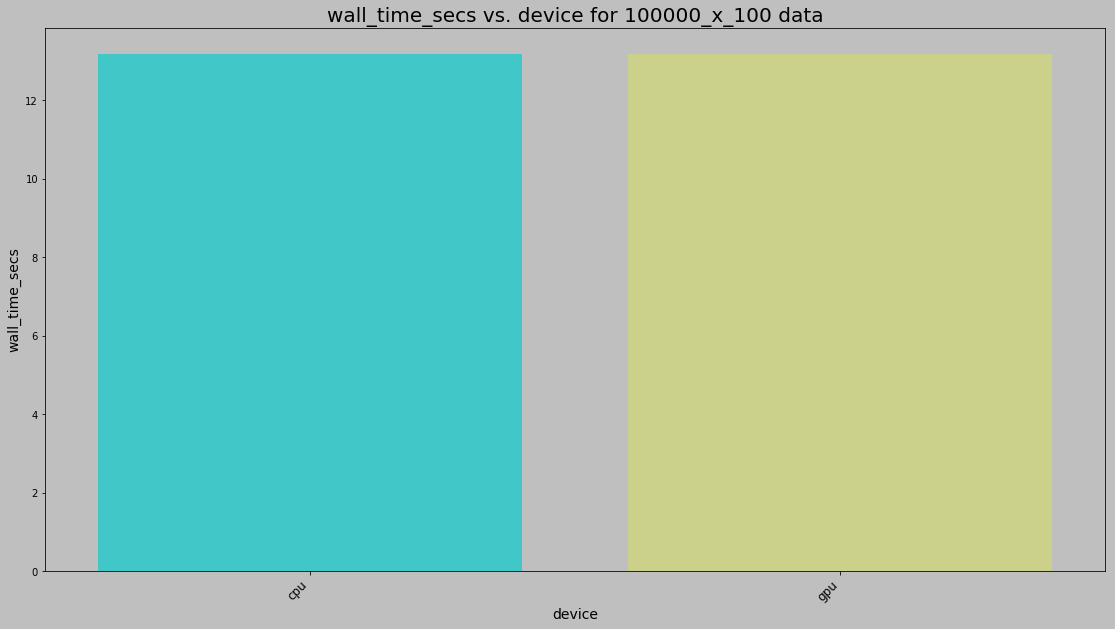

data_shape == "100000_x_100" :
       wall_time_secs
device               
cpu             13.17
gpu             13.18





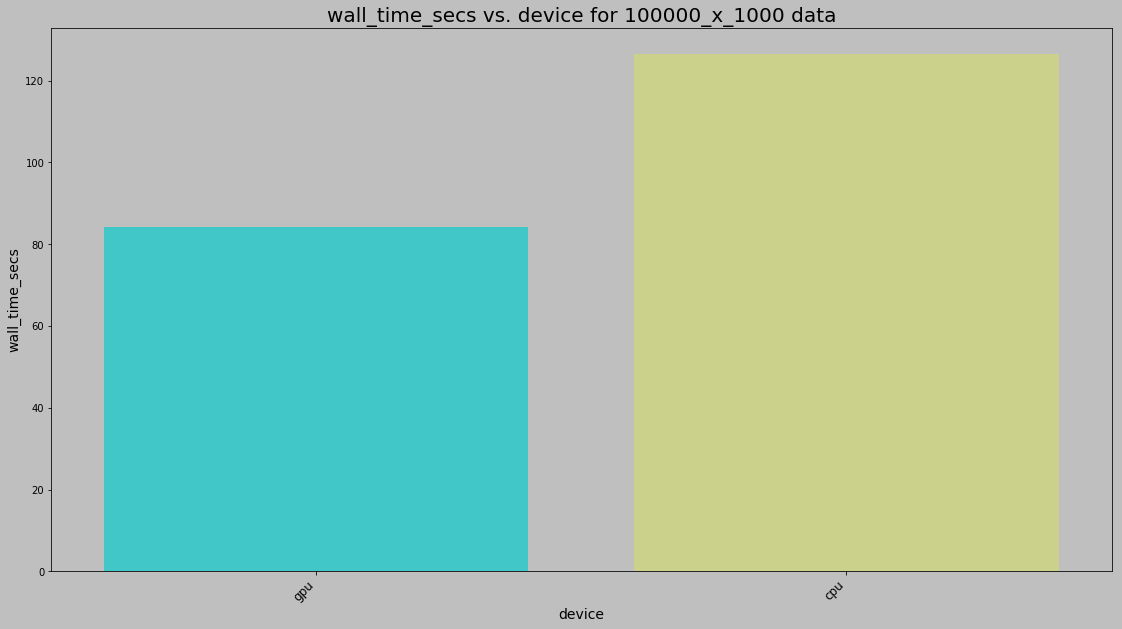

data_shape == "100000_x_1000" :
       wall_time_secs
device               
gpu             84.21
cpu            126.58





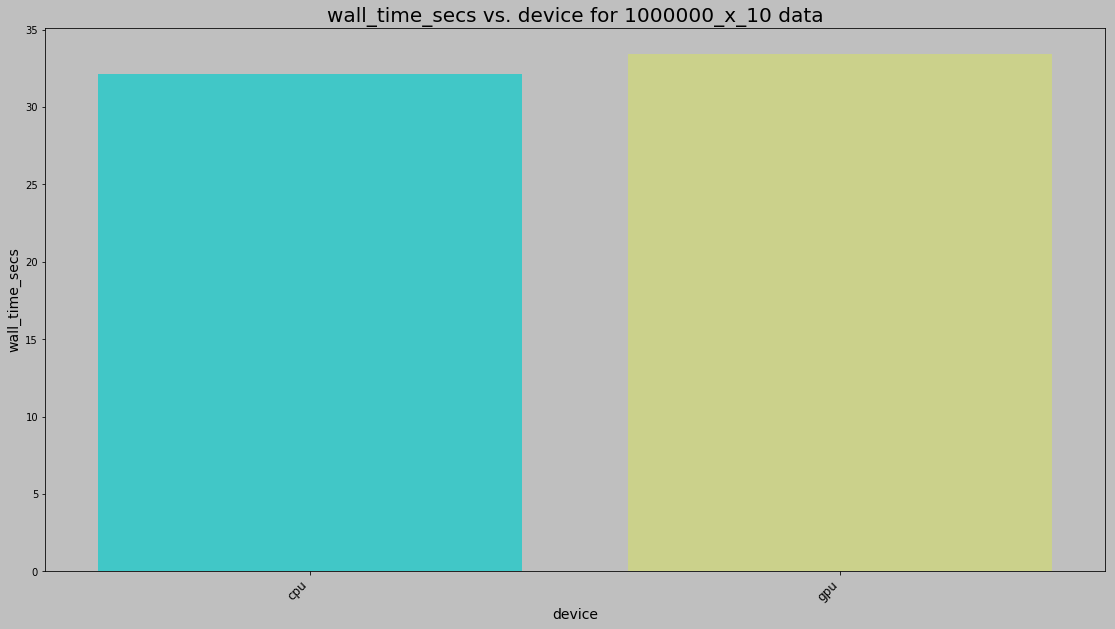

data_shape == "1000000_x_10" :
       wall_time_secs
device               
cpu             32.13
gpu             33.44





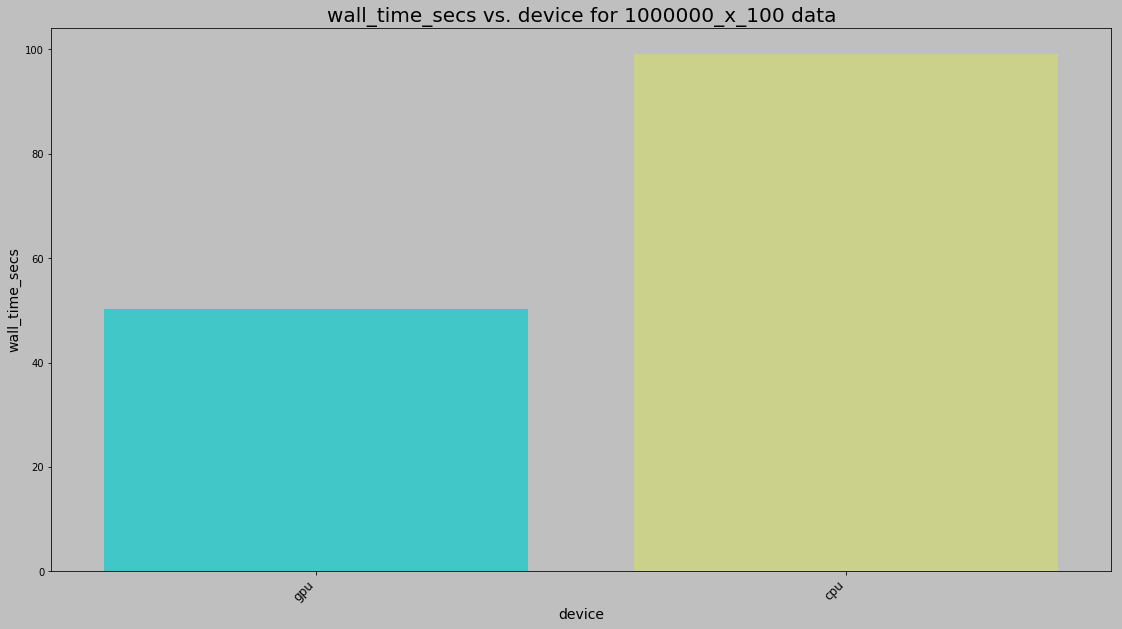

data_shape == "1000000_x_100" :
       wall_time_secs
device               
gpu             50.23
cpu             99.16





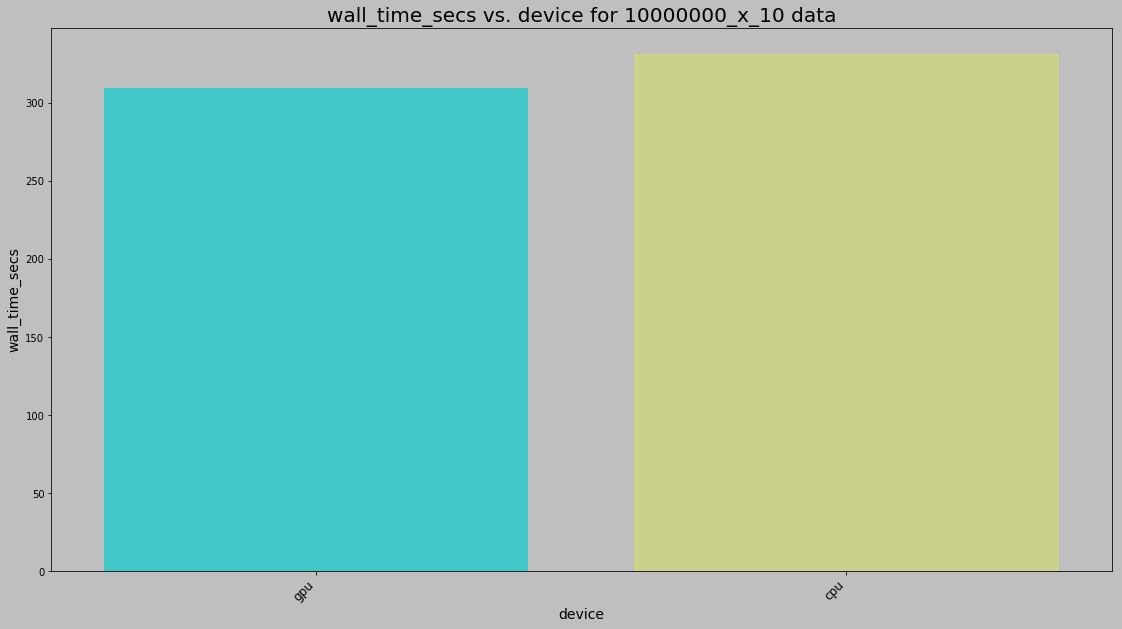

data_shape == "10000000_x_10" :
       wall_time_secs
device               
gpu            309.38
cpu            331.52





In [10]:
# plot compute times grouped by each combination
# of device, algo, and total_items

# define results col
results_col='wall_time_secs'

# define params columns
params_cols = ['algo_ver_device_cores', 'algo_ver_device', 'algo_ver', 'algo', 'version', 'device']
print(params_cols)

data_shapes_list=list(results_df['data_shape'].value_counts().index)

# establish common parameters range
# (in terms of percentiles)
# note: means have narrower 
# ranges than individual models
use_common_range=False
min_perc_to_plot = 1
max_perc_to_plot = 99
results_min, results_max = np.round(np.percentile(plotted_results_df[results_col], [min_perc_to_plot, max_perc_to_plot]), 3)
print(results_min, results_max)


for param in params_cols:

    for data_shape in data_shapes_list:

        # narrow down the data subset for comparability
        # query='device == "%s" & algo == "%s" & data_shape == "%s"' % (device, algo, data_shape)            
        query='data_shape == "%s"' % (data_shape)        

        # group results values by the levels of the current parameter
        results_by_param = plotted_results_df.query(query).groupby(param).mean()[results_col]
        # sort query results by results col (asc left to right)
        results_by_param = results_by_param.sort_values(ascending=True, inplace=False)
        
        # define font color as an universally 
        # visible font color (even on dark backgrounds)
        font_color='black'
        # font_color='darkgreen'
        # define plot canvass color 
        # with less eye-strain than white
        plot_color=(0.75, 0.75, 0.75) # silver
        
        plt.figure(figsize=(19,10), facecolor=plot_color) # 1900x1000
                
        ax = sns.barplot(x=results_by_param.index,
                     y=results_by_param, 
                     alpha=1.0, palette="rainbow")
        ax.set_facecolor(plot_color)

        if use_common_range:
            # set common y axis range
            ax.set_ylim([results_min, results_max])
            
        # set label names
        plt.xlabel(param, fontsize=14, color=font_color)
        plt.ylabel(results_col, fontsize=14, color=font_color)
        
        # rotate x-axis labels to make them fit
        plt.xticks(rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large', color=font_color)
        
        # total_items_log = np.log(total_items)
        plt.title("%s vs. %s for %s data" % (results_col, param, data_shape), fontsize=20, color=font_color)

        plt.show();

        print(query,":")
        print(pd.DataFrame(results_by_param).applymap("{0:.2f}".format))

        print("\n\n")


## All data

In [11]:
# get distributions of compute times for meaningful features combinations 

total_items_list=list(results_df['total_items'].value_counts().index)
data_shapes_list=list(results_df['data_shape'].value_counts().index)

algo_list=list(results_df['algo'].value_counts().index)
version_list=list(results_df['version'].value_counts().index)
device_list=list(results_df['device'].value_counts().index)

algo_ver_list=list(results_df['algo_ver'].value_counts().index)
algo_ver_device_list=list(results_df['algo_ver_device'].value_counts().index)
algo_ver_device_cores_list=list(results_df['algo_ver_device_cores'].value_counts().index)

all_items_colnames = ['algo_ver_device_cores', 'algo_ver_device', 'algo_ver', 'algo', 'version', 'device']

In [12]:
for data_shape in data_shapes_list:
 
    for colname in all_items_colnames:

        items_list = eval(colname + "_list")
        
        for item in items_list:

            query='data_shape == "%s" & %s == "%s"' % (data_shape, colname, item)

            print("\n",query,":")
            print(pd.DataFrame(results_df.query(query)['wall_time_secs'].describe()).applymap("{0:.2f}".format))



 data_shape == "10000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (GPU 1c)" :
      wall_time_secs
count        1326.00
mean            3.79
std             0.09
min             3.69
25%             3.72
50%             3.82
75%             3.82
max             3.96

 data_shape == "10000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 1c)" :
      wall_time_secs
count        1254.00
mean            2.31
std             0.03
min             2.27
25%             2.29
50%             2.32
75%             2.32
max             2.41

 data_shape == "10000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 4c)" :
      wall_time_secs
count        1194.00
mean            1.34
std             0.08
min             1.22
25%             1.28
50%             1.34
75%             1.44
max             1.44

 data_shape == "10000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 8c)" :
      wall_time_secs
count        1134.00
mean            1.49
std             0.06
min             1.32


      wall_time_secs
count        3468.00
mean            2.52
std             1.22
min             1.10
25%             1.37
50%             2.25
75%             3.38
max             5.48

 data_shape == "10000_x_10" & algo_ver == "xgboost 1.2.0rc1" :
      wall_time_secs
count        2952.00
mean           23.83
std            49.73
min             2.65
25%             2.96
50%             3.13
75%            13.03
max           169.58

 data_shape == "10000_x_10" & algo == "lightgbm" :
      wall_time_secs
count       15923.00
mean            2.37
std             1.03
min             1.10
25%             1.46
50%             2.25
75%             3.38
max             5.48

 data_shape == "10000_x_10" & algo == "xgboost" :
      wall_time_secs
count        2952.00
mean           23.83
std            49.73
min             2.65
25%             2.96
50%             3.13
75%            13.03
max           169.58

 data_shape == "10000_x_10" & version == "2.2.3" :
      wall_time_secs
coun

      wall_time_secs
count        4333.00
mean            4.56
std             2.77
min             2.17
25%             2.56
50%             3.14
75%             7.16
max             9.84

 data_shape == "10000_x_100" & algo_ver_device == "lightgbm 3.0 (CPU)" :
      wall_time_secs
count        2347.00
mean            2.97
std             1.47
min             1.77
25%             2.00
50%             2.51
75%             2.64
max             6.31

 data_shape == "10000_x_100" & algo_ver_device == "xgboost 1.2 (CPU)" :
      wall_time_secs
count        2347.00
mean           29.69
std            50.46
min             5.21
25%             5.73
50%             6.23
75%            14.96
max           165.41

 data_shape == "10000_x_100" & algo_ver_device == "lightgbm 2.2 (GPU)" :
      wall_time_secs
count        1318.00
mean            8.96
std             0.06
min             8.68
25%             8.92
50%             8.94
75%             9.01
max             9.09

 data_shape == "10000_

      wall_time_secs
count         455.00
mean           25.63
std             0.10
min            25.47
25%            25.59
50%            25.64
75%            25.67
max            26.07

 data_shape == "10000_x_1000" & algo_ver_device_cores == "lightgbm 3.0 (CPU 32c)" :
      wall_time_secs
count         404.00
mean            6.75
std             0.16
min             6.53
25%             6.53
50%             6.86
75%             6.86
max             6.90

 data_shape == "10000_x_1000" & algo_ver_device_cores == "xgboost 1.2 (CPU 32c)" :
      wall_time_secs
count         404.00
mean           36.44
std             0.48
min            36.16
25%            36.26
50%            36.26
75%            36.49
max            38.20

 data_shape == "10000_x_1000" & algo_ver_device_cores == "lightgbm 3.0 (CPU 64c)" :
      wall_time_secs
count         364.00
mean           10.42
std             0.65
min             9.35
25%            10.26
50%            10.26
75%            11.05
max        

      wall_time_secs
count         754.00
mean          195.30
std             8.41
min           188.18
25%           191.41
50%           191.55
75%           195.96
max           212.32

 data_shape == "10000_x_10000" & algo_ver_device_cores == "lightgbm 2.3 (CPU 16c)" :
      wall_time_secs
count         694.00
mean          129.14
std             5.54
min           124.16
25%           124.16
50%           128.06
75%           128.06
max           141.52

 data_shape == "10000_x_10000" & algo_ver_device_cores == "lightgbm 2.3 (CPU 32c)" :
      wall_time_secs
count         634.00
mean          111.77
std             1.42
min           109.41
25%           110.98
50%           111.97
75%           111.97
max           115.74

 data_shape == "10000_x_10000" & algo_ver_device_cores == "xgboost 1.2 (GPU 1c)" :
      wall_time_secs
count         545.00
mean           84.98
std             0.37
min            84.57
25%            84.59
50%            84.95
75%            85.36
max      

      wall_time_secs
count        1170.00
mean            2.89
std             0.20
min             2.69
25%             2.69
50%             2.91
75%             3.11
max             3.25

 data_shape == "100000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 8c)" :
      wall_time_secs
count        1110.00
mean            2.79
std             0.26
min             2.53
25%             2.53
50%             2.79
75%             2.83
max             3.28

 data_shape == "100000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 16c)" :
      wall_time_secs
count        1050.00
mean            3.13
std             0.17
min             2.95
25%             2.95
50%             3.02
75%             3.32
max             3.39

 data_shape == "100000_x_10" & algo_ver_device_cores == "lightgbm 2.3 (GPU 1c)" :
      wall_time_secs
count        1036.00
mean            7.01
std             0.08
min             6.88
25%             6.92
50%             7.04
75%             7.07
max            

      wall_time_secs
count        1036.00
mean            7.01
std             0.08
min             6.88
25%             6.92
50%             7.04
75%             7.07
max             7.30

 data_shape == "100000_x_10" & algo_ver_device == "xgboost 1.2 (GPU)" :
      wall_time_secs
count         537.00
mean            3.70
std             0.03
min             3.64
25%             3.69
50%             3.69
75%             3.72
max             3.74

 data_shape == "100000_x_10" & algo_ver == "lightgbm 2.2.3" :
      wall_time_secs
count        6845.00
mean            4.69
std             2.03
min             2.53
25%             2.95
50%             3.55
75%             6.99
max             7.87

 data_shape == "100000_x_10" & algo_ver == "lightgbm 2.3.1" :
      wall_time_secs
count        5260.00
mean            4.97
std             2.42
min             2.37
25%             2.75
50%             3.90
75%             6.92
max            11.19

 data_shape == "100000_x_10" & algo_ver == "

      wall_time_secs
count         352.00
mean            9.44
std             1.29
min             7.34
25%             9.04
50%             9.04
75%            10.68
max            10.68

 data_shape == "100000_x_100" & algo_ver_device_cores == "xgboost 1.2 (CPU 64c)" :
      wall_time_secs
count         352.00
mean          481.57
std             8.32
min           470.29
25%           470.29
50%           486.56
75%           486.56
max           490.52

 data_shape == "100000_x_100" & algo_ver_device_cores == "xgboost 1.2 (CPU 1c)" :
      wall_time_secs
count          72.00
mean           83.32
std             0.13
min            83.15
25%            83.15
50%            83.32
75%            83.45
max            83.45

 data_shape == "100000_x_100" & algo_ver_device_cores == "lightgbm 3.0 (CPU 1c)" :
      wall_time_secs
count          72.00
mean           22.91
std             0.16
min            22.76
25%            22.76
50%            22.95
75%            23.06
max           

      wall_time_secs
count         472.00
mean           36.82
std             3.77
min            31.71
25%            35.48
50%            35.48
75%            41.88
max            41.88

 data_shape == "100000_x_1000" & algo_ver_device_cores == "lightgbm 3.0 (CPU 8c)" :
      wall_time_secs
count         468.00
mean           54.63
std             1.31
min            53.50
25%            53.50
50%            54.27
75%            56.25
max            56.80

 data_shape == "100000_x_1000" & algo_ver_device_cores == "xgboost 1.2 (CPU 8c)" :
      wall_time_secs
count         468.00
mean          126.65
std             3.09
min           123.12
25%           123.12
50%           126.18
75%           130.12
max           130.12

 data_shape == "100000_x_1000" & algo_ver_device_cores == "lightgbm 3.0 (CPU 16c)" :
      wall_time_secs
count         435.00
mean           34.84
std             1.33
min            33.39
25%            33.39
50%            35.23
75%            36.46
max       

      wall_time_secs
count        1032.00
mean           14.96
std             0.38
min            14.16
25%            14.70
50%            14.78
75%            15.59
max            15.59

 data_shape == "1000000_x_10" & algo_ver_device_cores == "lightgbm 2.3 (GPU 1c)" :
      wall_time_secs
count         997.00
mean           36.12
std             0.75
min            35.10
25%            35.76
50%            35.77
75%            36.11
max            38.14

 data_shape == "1000000_x_10" & algo_ver_device_cores == "lightgbm 3.0 (GPU 1c)" :
      wall_time_secs
count         994.00
mean           35.29
std             0.16
min            35.02
25%            35.22
50%            35.28
75%            35.43
max            35.56

 data_shape == "1000000_x_10" & algo_ver_device_cores == "lightgbm 2.2 (CPU 32c)" :
      wall_time_secs
count         972.00
mean           15.44
std             0.32
min            15.07
25%            15.07
50%            15.45
75%            15.52
max         

      wall_time_secs
count        6734.00
mean           27.49
std            15.81
min            14.16
25%            15.45
50%            17.25
75%            41.49
max            55.45

 data_shape == "1000000_x_10" & algo_ver == "lightgbm 2.3.1" :
      wall_time_secs
count        5116.00
mean           26.80
std            14.12
min            13.40
25%            15.48
50%            17.19
75%            35.77
max            55.66

 data_shape == "1000000_x_10" & algo_ver == "lightgbm 3.0.0rc1" :
      wall_time_secs
count        3185.00
mean           18.94
std            12.53
min             6.71
25%             7.72
50%            14.67
75%            35.22
max            47.25

 data_shape == "1000000_x_10" & algo_ver == "xgboost 1.2.0rc1" :
      wall_time_secs
count        2704.00
mean          135.68
std           172.86
min             6.93
25%            56.28
50%            76.96
75%           110.74
max           578.68

 data_shape == "1000000_x_10" & algo == "light

      wall_time_secs
count        2165.00
mean           43.47
std            29.23
min            21.52
25%            24.96
50%            36.83
75%            60.97
max           188.92

 data_shape == "1000000_x_100" & algo_ver_device == "xgboost 1.2 (CPU)" :
      wall_time_secs
count        2165.00
mean          245.12
std           188.51
min           100.41
25%           123.85
50%           172.11
75%           238.24
max           751.49

 data_shape == "1000000_x_100" & algo_ver_device == "lightgbm 2.2 (GPU)" :
      wall_time_secs
count        1267.00
mean           59.49
std             2.30
min            55.91
25%            55.91
50%            60.57
75%            61.23
max            62.45

 data_shape == "1000000_x_100" & algo_ver_device == "lightgbm 3.0 (GPU)" :
      wall_time_secs
count         980.00
mean           49.61
std             0.47
min            48.88
25%            49.32
50%            49.44
75%            49.78
max            50.55

 data_shape == "

      wall_time_secs
count         456.00
mean           89.00
std             0.55
min            87.38
25%            88.89
50%            89.11
75%            89.32
max            89.46

 data_shape == "10000000_x_10" & algo_ver_device_cores == "xgboost 1.2 (CPU 8c)" :
      wall_time_secs
count         456.00
mean          939.05
std            42.33
min           881.31
25%           889.66
50%           922.14
75%           986.66
max           986.66

 data_shape == "10000000_x_10" & algo_ver_device_cores == "lightgbm 3.0 (CPU 16c)" :
      wall_time_secs
count         420.00
mean           58.36
std             0.75
min            57.52
25%            57.89
50%            57.94
75%            59.32
max            61.72

 data_shape == "10000000_x_10" & algo_ver_device_cores == "xgboost 1.2 (CPU 16c)" :
      wall_time_secs
count         420.00
mean          671.20
std            26.54
min           624.77
25%           650.87
50%           653.02
75%           699.48
max       